# (ProsperLoan Data Exploration )
## by (Adebayo Ishola)

## Preliminary Wrangling

> This document explores a dataset containing information for approximately 113937 of loanees and investors 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Set the rows, columns and column width at maximium for proper view
pd.set_option('display.max_rows', 100000)

pd.set_option('display.max_columns', 10000)

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
# load in the dataset into a pandas dataframe, print statistics
prosperloan = pd.read_csv('prosperLoanData.csv')
prosperloan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
# extract some columns from the main dataset
prosperloan_new = prosperloan[['ListingNumber','CreditGrade','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','EmploymentStatus','AmountDelinquent','TotalTrades','TradesNeverDelinquent (percentage)','DebtToIncomeRatio','StatedMonthlyIncome', 'LoanOriginalAmount','MonthlyLoanPayment','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees','Investors']]

In [5]:
# rename the columns names and make use of lowercase
prosperloan_new.rename(columns ={'ListingNumber':'listing_number','CreditGrade':'credit_grade', 'LoanStatus':'loan_status', 'BorrowerAPR':'borrower_apr', 'BorrowerRate':'borrower_rate', 'LenderYield':'lender_yield', 'EmploymentStatus':'employment_status', 'AmountDelinquent':'amount_delinquent', 'TotalTrades':'total_trades', 'TradesNeverDelinquent (percentage)':'trades_never_delinquent(percentage)', 'DebtToIncomeRatio':'debt_to_income_ratio', 'StatedMonthlyIncome':'stated_monthly_income', 'LoanOriginalAmount':'loan_original_amount', 'MonthlyLoanPayment':'monthly_loan_payment', 'LP_CustomerPayments':'lp_customer_payments', 'LP_CustomerPrincipalPayments':'lp_customer_principa_payments', 'LP_InterestandFees':'lp_interest_and_fees', 'Investors':'investors'}, inplace = True);

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
# rename NaN to N/A in the credit_grade columns
prosperloan_new['credit_grade'] = prosperloan_new['credit_grade'].fillna('N/A')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
# drop every null value from the new dataset
prosperloan_new = prosperloan_new.dropna()

In [8]:
# print statistics
prosperloan_new.head()

,listing_number,credit_grade,loan_status,borrower_apr,borrower_rate,lender_yield,employment_status,amount_delinquent,total_trades,trades_never_delinquent(percentage),debt_to_income_ratio,stated_monthly_income,loan_original_amount,monthly_loan_payment,lp_customer_payments,lp_customer_principa_payments,lp_interest_and_fees,investors
0,193129,C,Completed,0.16516,0.1580,0.1380,Self-employed,472.0,11.0,0.81,0.17,3083.333333,9425,330.43,11396.14,9425.00,1971.14,258
1,1209647,N/A,Current,0.12016,0.0920,0.0820,Employed,0.0,29.0,1.00,0.18,6125.000000,10000,318.93,0.00,0.00,0.00,1
3,658116,N/A,Current,0.12528,0.0974,0.0874,Employed,10056.0,26.0,0.76,0.15,2875.000000,10000,321.45,5143.20,4091.09,1052.11,158
4,909464,N/A,Current,0.24614,0.2085,0.1985,Employed,0.0,39.0,0.95,0.26,9583.333333,15000,563.97,2819.85,1563.22,1256.63,20
5,1074836,N/A,Current,0.15425,0.1314,0.1214,Employed,0.0,47.0,1.00,0.36,8333.333333,15000,342.37,679.34,351.89,327.45,1


In [9]:
# high-level overview of data shape and composition
print(prosperloan_new.shape)
print(prosperloan_new.dtypes)
print(prosperloan_new.head(10))

(97903, 18)
listing_number                           int64
credit_grade                            object
loan_status                             object
borrower_apr                           float64
borrower_rate                          float64
lender_yield                           float64
employment_status                       object
amount_delinquent                      float64
total_trades                           float64
trades_never_delinquent(percentage)    float64
debt_to_income_ratio                   float64
stated_monthly_income                  float64
loan_original_amount                     int64
monthly_loan_payment                   float64
lp_customer_payments                   float64
lp_customer_principa_payments          float64
lp_interest_and_fees                   float64
investors                                int64
dtype: object
    listing_number credit_grade loan_status  borrower_apr  borrower_rate  \
0           193129            C   Completed       0.

In [10]:
# convert credit_grade, loan_status, and employment_status into ordered categorical types
ordinal_var_dict = {'credit_grade': ['N/A','HR','E','D','C','B','A','AA'],
                    'loan_status': ['Cancelled', 'Defaulted', 'Chargedoff', 'Current', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'FinalPaymentInProgress', 'Completed'],
                    'employment_status': ['Not employed', 'Retired', 'Self-employed', 'Part-time', 'Full-time', 'Employed', 'Other']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    prosperloan_new[var] = prosperloan_new[var].astype(ordered_var)

In [11]:
# descriptive statistics for numeric variables
print(prosperloan_new.describe())

       listing_number  borrower_apr  borrower_rate  lender_yield  \
count    9.790300e+04  97903.000000   97903.000000  97903.000000   
mean     6.694215e+05      0.217565       0.190680      0.180545   
std      3.022830e+05      0.080075       0.074466      0.074216   
min      9.827900e+04      0.006530       0.000000     -0.010000   
25%      4.621720e+05      0.155380       0.131400      0.121400   
50%      6.298260e+05      0.207350       0.180000      0.170000   
75%      9.212530e+05      0.280320       0.249200      0.239200   
max      1.255149e+06      0.423950       0.360000      0.340000   

       amount_delinquent  total_trades  trades_never_delinquent(percentage)  \
count       97903.000000  97903.000000                         97903.000000   
mean         1003.242046     23.437862                             0.883952   
std          7154.343694     11.876620                             0.149377   
min             0.000000      0.000000                             0.00

### What is the structure of your dataset?

> There are 97903 prosper in the dataset with  18 features (listing_number, credit_grade, borrower_apr, borrower_rate,
lender_yield, amount_delinquent, total_trades, trades_never_delinquent(percentage), debt_to_income_ratio, stated_monthly_income, loan_original_amount, monthly_loan_payment, lp_customer_payments, lp_customer_Principa_payments, lp_interest_and_fees, investors). 

> Most variables are numeric in nature, but the variables credit_grad, loan_status, and employment_status are ordered factor variables with the following levels.

(worst) ——> (best)
>**credit_grade:** 'N/A','HR','E','D','C','B','A','AA'

>**loan_status:** 'Cancelled', 'Defaulted', 'Chargedoff', 'Current', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'FinalPaymentInProgress', 'Completed'

>**employment_status:** 'Not employed', 'Retired', 'Self-employed', 'Part-time', 'Full-time', 'Employed', 'Other'

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting if the borrowers rate can encourage loanee's to get loans in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that Borrower's interest rate for this loan (borrower_rate) will attract more loan collectors. But I will like to see if the employment status did have an effect on the investors.

## Univariate Exploration

>  I'll start by looking at the distribution of the main variable of interest: borrower_rate.

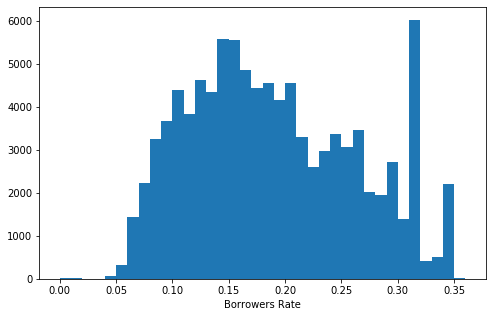

In [12]:
# plot borrower_rate on a standard-scaled 

bins = np.arange(0, prosperloan_new['borrower_rate'].max()+0.01, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'borrower_rate', bins = bins)
plt.xlabel('Borrowers Rate')
plt.show()

Borrowers rate is a distribution that seems to be normal which has its highest frequency around 0.32, followed by another frequency at 0.14. The lowest frequencies are around (0.01 - 0.02) and 0.36 respectively.   

Next up, another predictor variable of interest: Borrower APR.

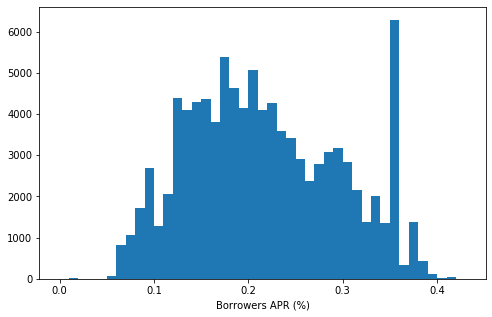

In [13]:
# plot borrower_apr on a standard-scaled 

bins = np.arange(0, prosperloan_new['borrower_apr'].max()+0.01, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'borrower_apr', bins = bins)
plt.xlabel('Borrowers APR (%)')
plt.show()

Borrowers APR is a distribution that seems also to be normal just like the Borrowers rate. The highest frequency for this distribution is around 0.36. its next higher frequency is at 0.18. The lowest frequencies are around 0.02 and 0.41 respectively.   

Next up, in the predictor variable of interest: Lender Yield.   

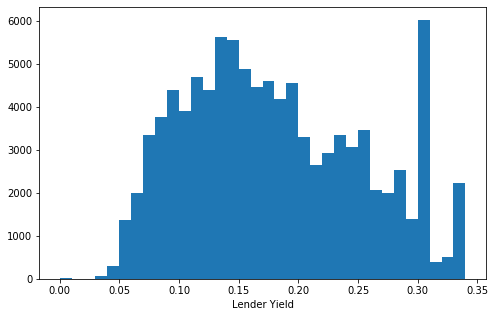

In [14]:
# plot lender_yield on a standard-scaled 

bins = np.arange(0, prosperloan_new['lender_yield'].max()+0.01, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'lender_yield', bins = bins)
plt.xlabel('Lender Yield')
plt.show()

Lender Yield is a distribution that seems also to be normal just like the Borrowers rate too. The highest frequency for this distribution is around 0.31. its next higher frequency is at 0.14. The lowest frequency is around 0.01 

Next up, in the numeric variable of interest: Total Trades.   

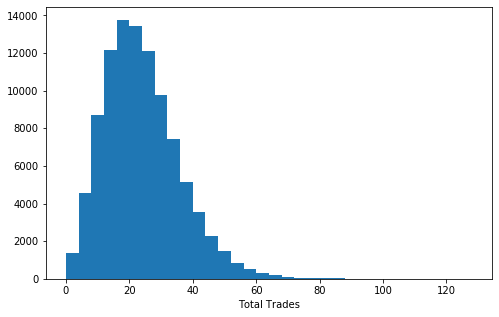

In [15]:
# plot total_trades on a standard-scaled 

bins = np.arange(0, prosperloan_new['total_trades'].max()+4, 4)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'total_trades', bins = bins)
plt.xlabel('Total Trades')
plt.show()

Total Trades is a normal distribution with data skewed to the right. The highest frequency for this distribution is around 20 and the lowest frequency is around 80 at the distribution tail. 

Next up, in the numeric variable of interest: Amount Delinquent.

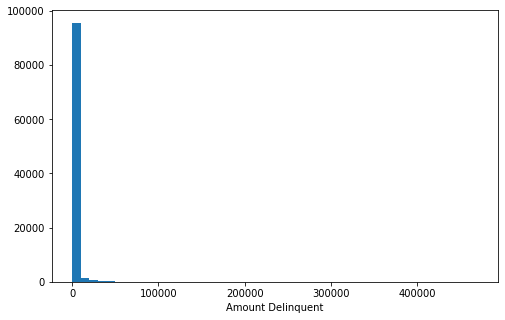

In [16]:
# plot amount_delinquent a on standard-scaled 

bins = np.arange(0, prosperloan_new['amount_delinquent'].max()+10000, 10000)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'amount_delinquent', bins = bins)
plt.xlabel('Amount Delinquent')
plt.show()

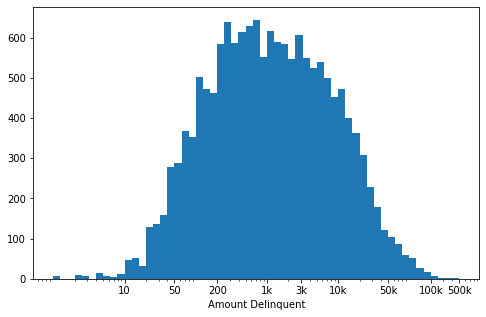

In [17]:
# the distribution seems to be shrinked, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(prosperloan_new['amount_delinquent'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'amount_delinquent', bins = bins)
plt.xscale('log')
plt.xticks([10, 50, 200, 1e3, 3e3, 1e4, 5e4, 2e5, 5e5], [10, 50, 200,'1k', '3k', '10k',  '50k', '100k', '500k'])
plt.xlabel('Amount Delinquent')
plt.show()

The Amount Delinquent when explored on a standard scale didn't reflect the data properly, So a log scale was used to see what the distribution is. Amount Delinquent is a normal distribution with its data well spread. The highest frequency for this distribution is around 800 slightly, above 400, which is the next highest frequency. The lowest frequencies are around 300 and 400 at the distribution tail. 

Next up, is the characters variables in the dataset: Credit Grade, Loan Status, and Employment Status.

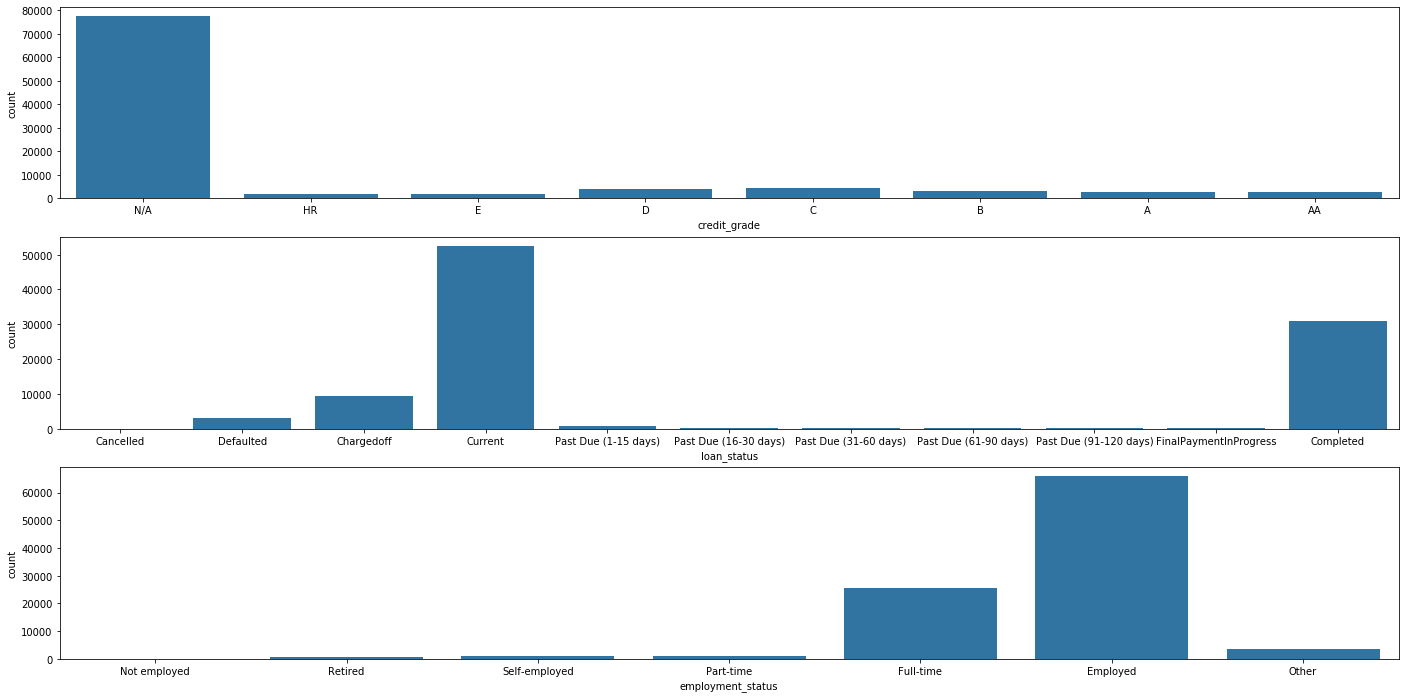

In [18]:
# let's plot all three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [24,12])
 
default_color = sb.color_palette()[0]
sb.countplot(data = prosperloan_new, x = 'credit_grade', color = default_color, ax = ax[0])
sb.countplot(data = prosperloan_new, x = 'loan_status', color = default_color, ax = ax[1])
sb.countplot(data = prosperloan_new, x = 'employment_status', color = default_color, ax = ax[2])

plt.show()

Credit Grade shows we have a lot of loanees that are yet to have their credit rating assigned at the time of listing. The lowest credit grade rating is N/A while the highest rating in AA. We have fewer people that have been rated from HR and E. Then in A and AA category we few people there too and B, C, D has an increasing number of loanees slightly different from one another.

In the Loan Status, we can see that there is a huge amount of loanees at the Current category followed by a few numbers of loanees that have Completed their loans. No one seems to have Cancelled their loan but some people have Defaulted and Chagredoff their loans. We fewer people in other remaining categories such as loanees with Past Due and Final Payment Progress.

Looking at the Employment Status, the loanees that are in the Employed category are much followed by the Full-Time category. The Other category has fewer loanees of different work status. There is no loanee that is Not employed. Retired, Self-employed, and Part-time categories have the lowest numbers of loanees.


I want to check other numeric variables. Trades Never Delinquent is Next

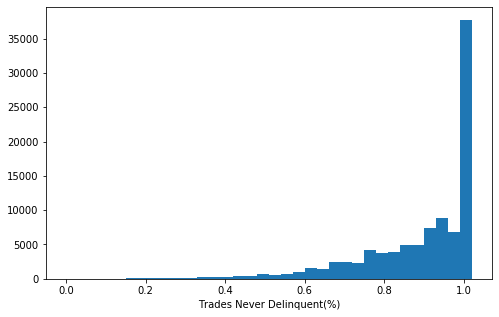

In [19]:
# plot trades_never_delinquent(percentage) on a standard-scaled 

bins = np.arange(0, prosperloan_new['trades_never_delinquent(percentage)'].max()+0.03, 0.03)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'trades_never_delinquent(percentage)', bins = bins)
plt.xlabel('Trades Never Delinquent(%)')
plt.show()

Trades Never Delinquent is a left-skewed distribution with a long tail. The highest frequency for this distribution is around 1.1. The lowest frequencies are by 0.2 at the distribution tail. 

Next up, in the numeric variable: Debt To Income Ratio.

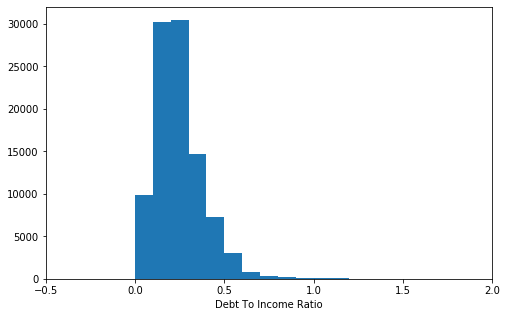

In [20]:
# plot debt_to_income_ratio on a standard-scaled 

bins = np.arange(0, prosperloan_new['debt_to_income_ratio'].max()+0.1, 0.1)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'debt_to_income_ratio', bins = bins)
plt.xlabel('Debt To Income Ratio')
plt.xlim(-0.5, 1.5)
plt.xticks([-0.5, 0, 0.5, 1, 1.5, 2])
plt.show()

Debt To Income Ratio is a right-skewed distribution. The distribution was explored with the use of lim (-0.5, 1.5). The highest frequency for this distribution is around 0.3. The lowest frequencies are around 1, 1.1, and 1.2 respectively at the distribution tail.

Next up, in the numeric variable: Stated Monthly Income.

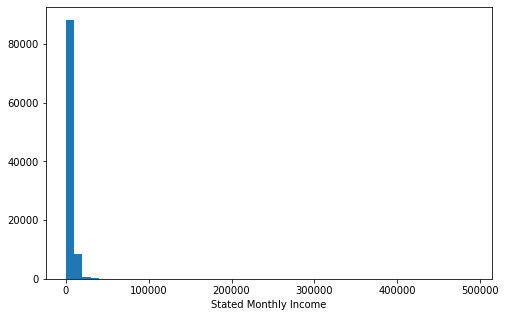

In [21]:
# plot stated_monthly_income on a standard-scaled 

bins = np.arange(0, prosperloan_new['stated_monthly_income'].max()+10000, 10000)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'stated_monthly_income', bins = bins)
plt.xlabel('Stated Monthly Income')
plt.show()

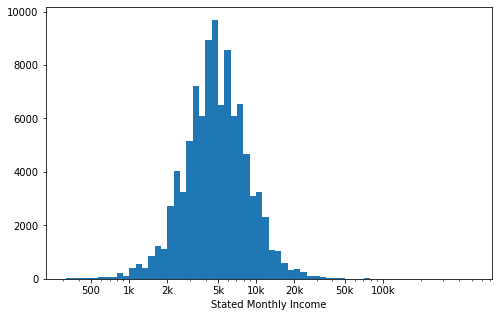

In [22]:
# the distribution seems to be shrinked, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(2.5, np.log10(prosperloan_new['stated_monthly_income'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'stated_monthly_income', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5], [500, '1k', '2k','5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Stated Monthly Income')
plt.show()

Stated Monthly Income when explored on a standard scale didn't reflect the data properly, so a log scale transformation was used for this distribution. Stated Monthly Income is a normal distribution. The highest frequency for this distribution is around 6000. The lowest frequencies are at the left and right sides of the tail distribution. Values are around 200, 300, 40k, 50, and 80k respectively.

Next up, in the numeric variable: Loan Original Amount.

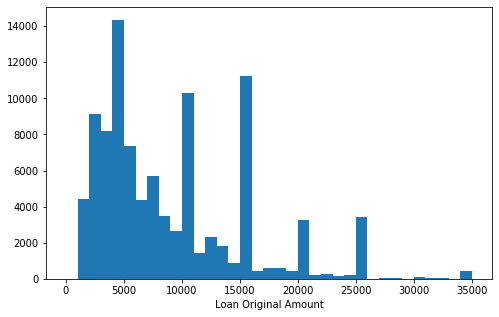

In [23]:
# plot loan_original_amount on a standard-scaled 

bins = np.arange(0, prosperloan_new['loan_original_amount'].max()+1000, 1000)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'loan_original_amount', bins = bins)
plt.xlabel('Loan Original Amount')
plt.show()

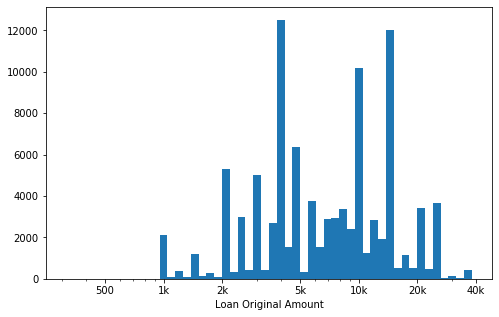

In [24]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.04
bins = 10 ** np.arange(2.5, np.log10(prosperloan_new['loan_original_amount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'loan_original_amount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4], [500, '1k', '2k', '5k', '10k', '20k', '40k'])
plt.xlabel('Loan Original Amount')
plt.show()

The Loan Original Amount was explored on a standard scale that shows the distribution from 1000 left out a few details, so a log scale transformation was used to get the remaining detailed in the distribution. The highest frequency for this distribution is around 4k, slightly above 16k, which is the next highest frequency. The lowest frequencies are by 30k.

Next up, in the numeric variable: Monthly Loan Payment.

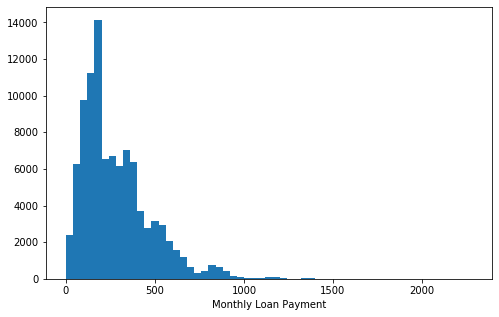

In [25]:
# plot monthly_loan_payment on a standard-scaled 

bins = np.arange(0, prosperloan_new['monthly_loan_payment'].max()+40, 40)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'monthly_loan_payment', bins = bins)
plt.xlabel('Monthly Loan Payment')
plt.show()

Monthly Loan Payment is a right-skewed distribution. The highest frequency for this distribution is around 150. The lowest frequencies are by 1000. 

Next up, in the numeric variable: LP Customer Payments and LP Customer Principa Payments.

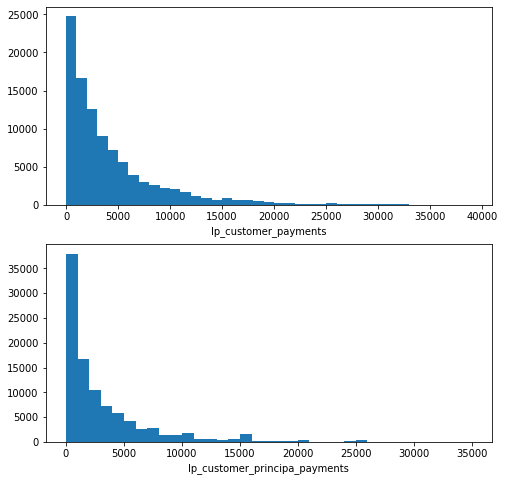

In [26]:
# plot the distribution of lp_customer_payments, lp_customer_principa_payments
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

variables = ['lp_customer_payments', 'lp_customer_principa_payments']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(prosperloan_new[var]), max(prosperloan_new[var])+1000, 1000)
    ax[i].hist(data = prosperloan_new, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))

plt.show()

LP Customer Payments and LP Customer Principa Payments are right-skewed distributions with long tails. The highest frequency for both distributions is around 1000. Let's explore the distribution of log scale transformation for more details. 

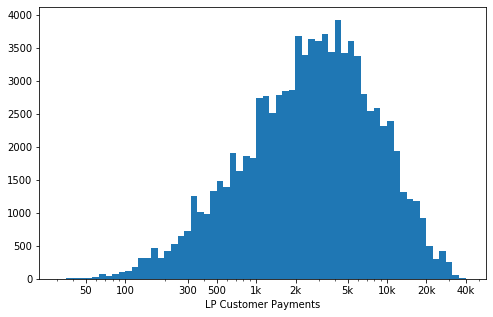

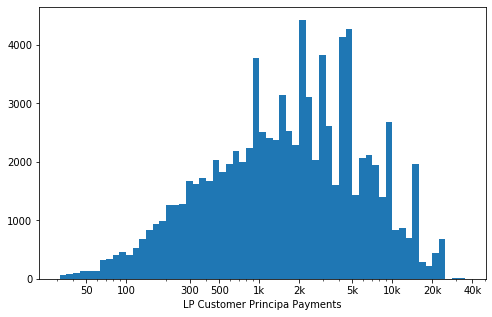

In [27]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(1.5, np.log10(prosperloan_new['lp_customer_payments'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'lp_customer_payments', bins = bins)
plt.xscale('log')
plt.xticks([50, 100, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4], [50, 100, 300, 500, '1k', '2k', '5k', '10k', '20k', '40k'])
plt.xlabel('LP Customer Payments')
plt.show()

# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(1.5, np.log10(prosperloan_new['lp_customer_principa_payments'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'lp_customer_principa_payments', bins = bins)
plt.xscale('log')
plt.xticks([50, 100, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4], [50, 100, 300, 500, '1k', '2k', '5k', '10k', '20k', '40k'])
plt.xlabel('LP Customer Principa Payments')
plt.show()

LP Customer Payments is a normal distribution when its explore on log scale transformation. Its data are well spread. The highest frequency for this distribution is around 4k. The lowest frequencies are around 10 and 30 at the left side of the distribution tail. 

LP Customer Principa Payments looks like a normal distribution with many heigh frequencies when its explore on log scale transformation. Its data are well spread also, and the highest frequency for this distribution is around 2100. The lowest frequency is by 30k.

Next up, in the numeric variable: LP Interest And Fees.

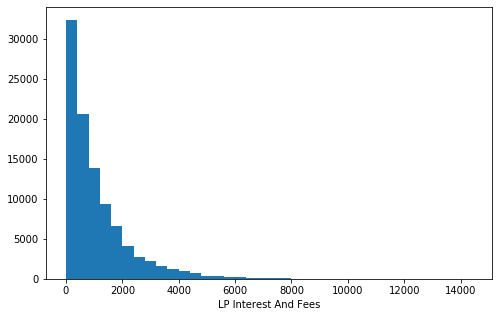

In [28]:
# plot lp_interest_and_fees on a standard-scaled 

bins = np.arange(0, prosperloan_new['lp_interest_and_fees'].max()+400, 400)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'lp_interest_and_fees', bins = bins)
plt.xlabel('LP Interest And Fees')
plt.show()

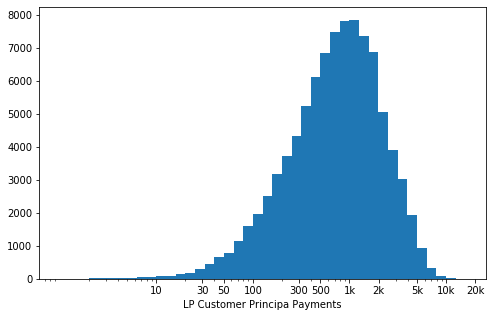

In [29]:
# there's a long tail in the distribution and also there seems to be some hidden deatils, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(prosperloan_new['lp_interest_and_fees'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'lp_interest_and_fees', bins = bins)
plt.xscale('log')
plt.xticks([10, 30, 50, 100, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4], [10, 30, 50, 100, 300, 500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('LP Customer Principa Payments')
plt.show()

LP Interest And Fees is a right-skewed distribution with long tails on a standard scale. The highest frequency for this distribution is around 1000. A log scale helped to get more details about this distribution. On the log scale, LP Interest And Fees is a normal distribution. The highest frequency for this distribution is around 1500 different from what we observed on the standard scale. The lowest frequencies fall at both sides of the tails of the distribution, by 1-5 and 11k.

Lets look at Investors which is one of the  the predictor variable of interest.

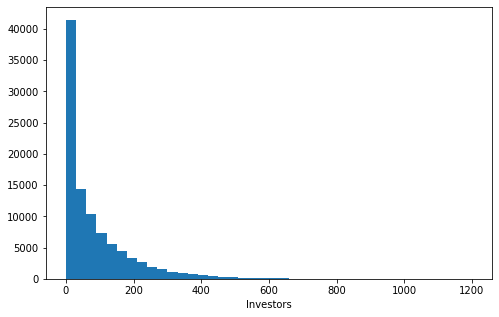

In [30]:
# plot investors on a standard-scaled 

bins = np.arange(0, prosperloan_new['investors'].max()+30, 30)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'investors', bins = bins) 
plt.xlabel('Investors')
plt.show()

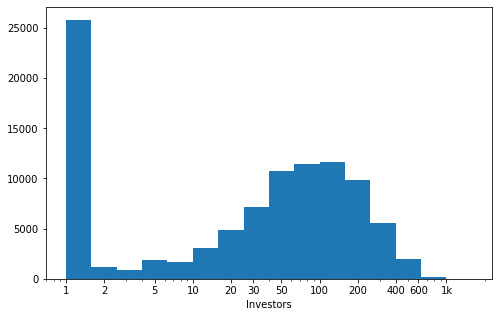

In [31]:
# there's a long tail in distribution and also there seems to be some hidden deatils, so let's put it on a log scale instead
log_binsize = 0.2
bins = 10 ** np.arange(0, np.log10(prosperloan_new['investors'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan_new, x = 'investors', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 30, 50, 100, 200, 400, 600, 1e3], [1, 2, 5, 10, 20, 30, 50, 100, 200, 400, 600, '1k'])
plt.xlabel('Investors')
plt.show()

The investors is a right-skewed distribution with long tails on a standard scale. The highest frequency for this distribution is around 30. A log scale helped to get more details about this distribution. On the log scale, the distribution looks like a normal distribution with the highest frequency at 1.5. The lowest frequencies at 1k.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I have two main variables of interest, even if coupled with other variables. The borrower rate is one of the variables of interest that did not need any transformation, but the distribution was a bit similar to two variables borrower APR and lender yield in the dataset. Investors is the second variable that its of interest to me. I have to do a transformation on this variable for a better understanding of the distribution and to see more details in the distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I have many data that are null values and many columns. I have to drop most columns with Null values and also rename some data in the credit grade variable to what it should be after I have checked the variable definitions documents. I extract the columns of interest from the actual dataset.

## Bivariate Exploration

> To start off with, I want to look at the pairwise correlations present between features in the data.

In [32]:
# Extract the variables into a different category for easy use.
numeric_vars = ['borrower_apr', 'borrower_rate', 'lender_yield', 'amount_delinquent','total_trades','trades_never_delinquent(percentage)','debt_to_income_ratio','stated_monthly_income','loan_original_amount','monthly_loan_payment','lp_customer_payments','lp_customer_principa_payments','lp_interest_and_fees','investors']
numeric_vars1 = ['borrower_apr', 'borrower_rate', 'lender_yield', 'amount_delinquent','total_trades','trades_never_delinquent(percentage)','debt_to_income_ratio']
numeric_vars2 = ['stated_monthly_income','loan_original_amount','monthly_loan_payment','lp_customer_payments','lp_customer_principa_payments','lp_interest_and_fees','investors']
categoric_vars = ['credit_grade', 'loan_status', 'employment_status']
categoric_vars1 = ['credit_grade', 'employment_status']
categoric_vars2 = ['credit_grade', 'loan_status']
categoric_vars3 = ['loan_status', 'employment_status']

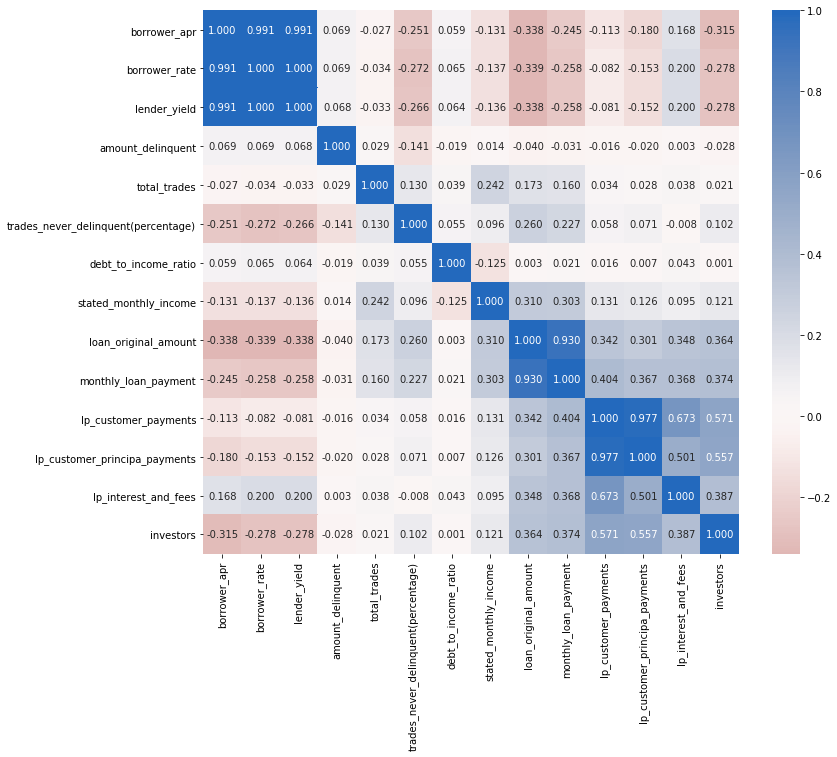

In [33]:
# correlation plot
plt.figure(figsize = [12, 10])
sb.heatmap(prosperloan_new[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

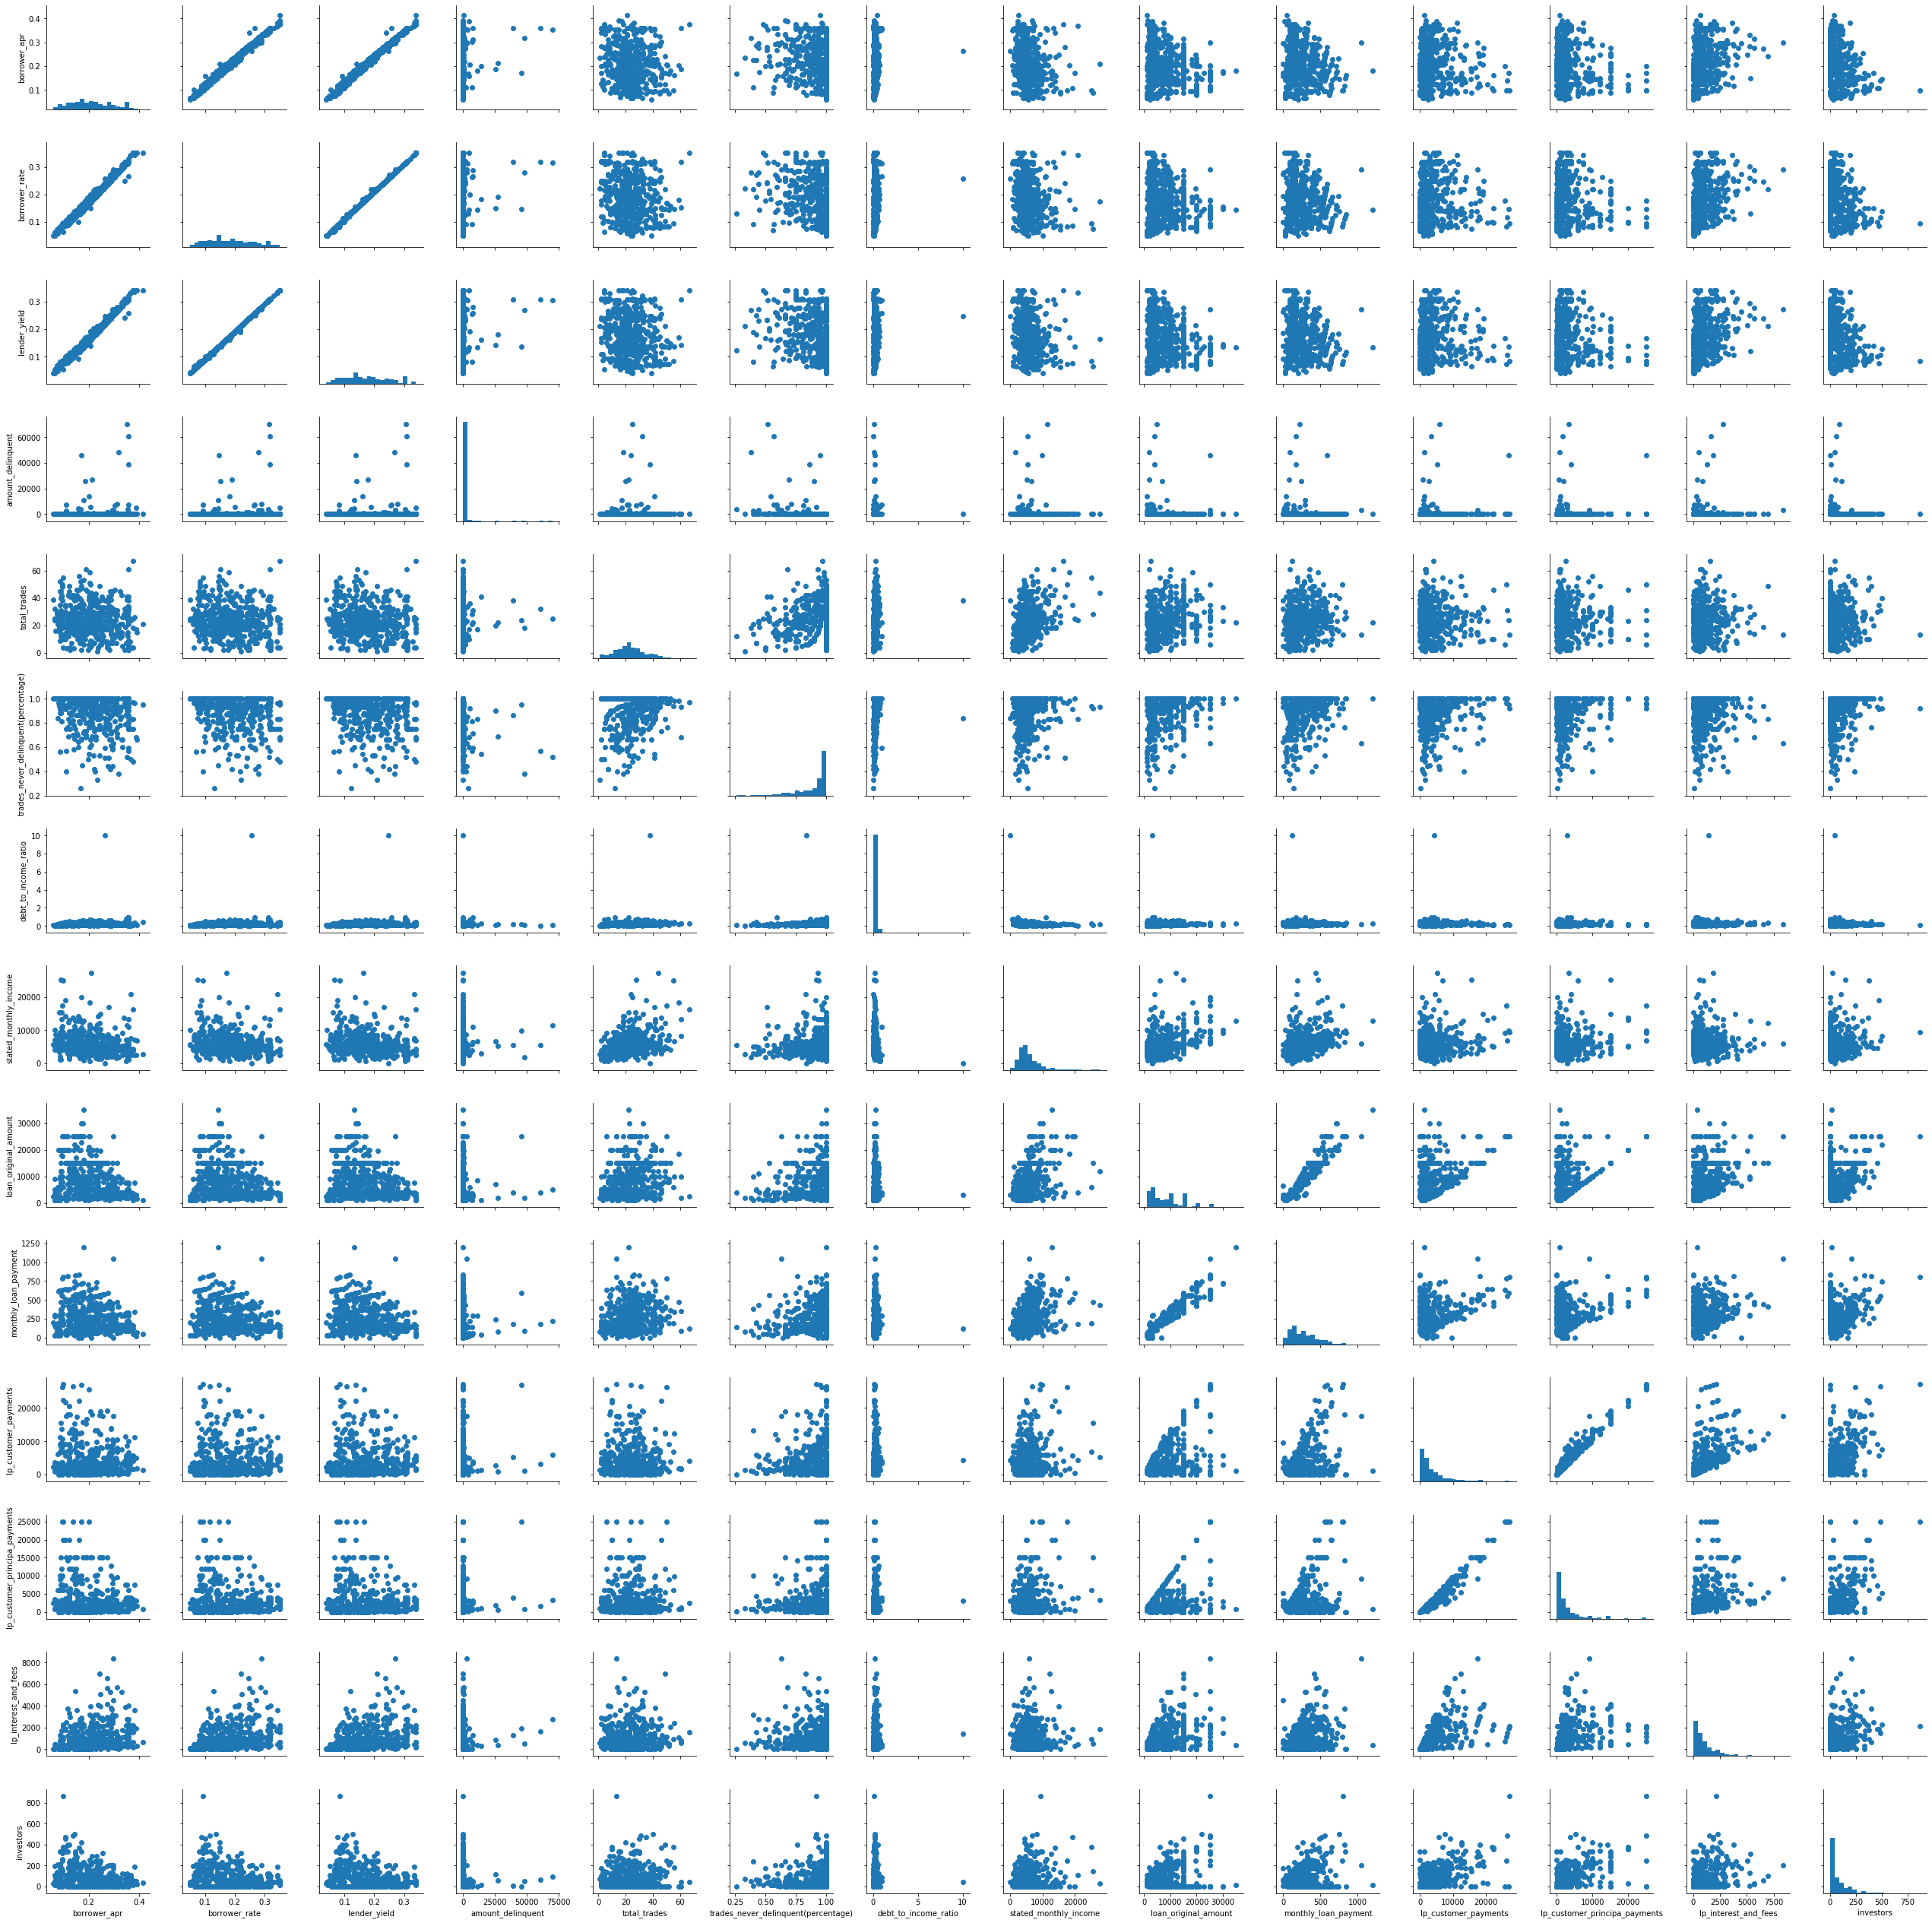

In [34]:
# plot matrix: sample 500 prosperloan so that plots are clearer and they render faster
samples = np.random.choice(prosperloan_new.shape[0], 500, replace = False)
prosperloan_new_samp = prosperloan_new.iloc[samples,:]

g = sb.PairGrid(data = prosperloan_new_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

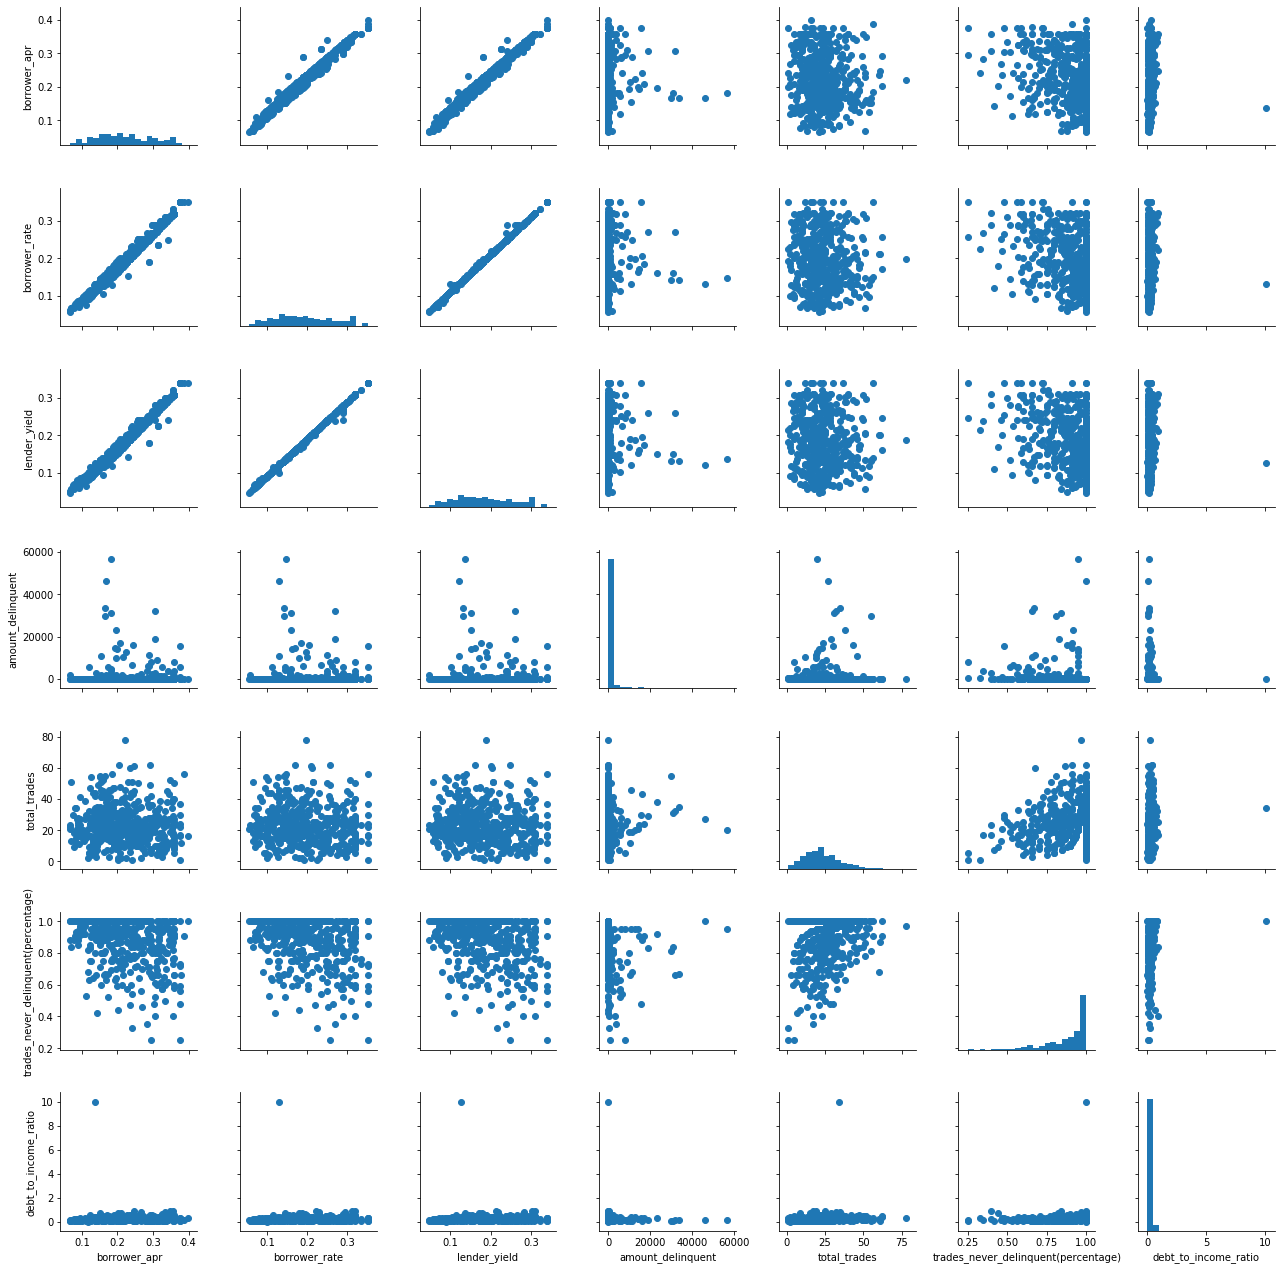

In [35]:
# plot matrix: sample 500 prosperloan for numeric_vars1 so that plots are clearer and they render faster
samples = np.random.choice(prosperloan_new.shape[0], 500, replace = False)
prosperloan_new_samp = prosperloan_new.iloc[samples,:]

g = sb.PairGrid(data = prosperloan_new_samp, vars = numeric_vars1)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

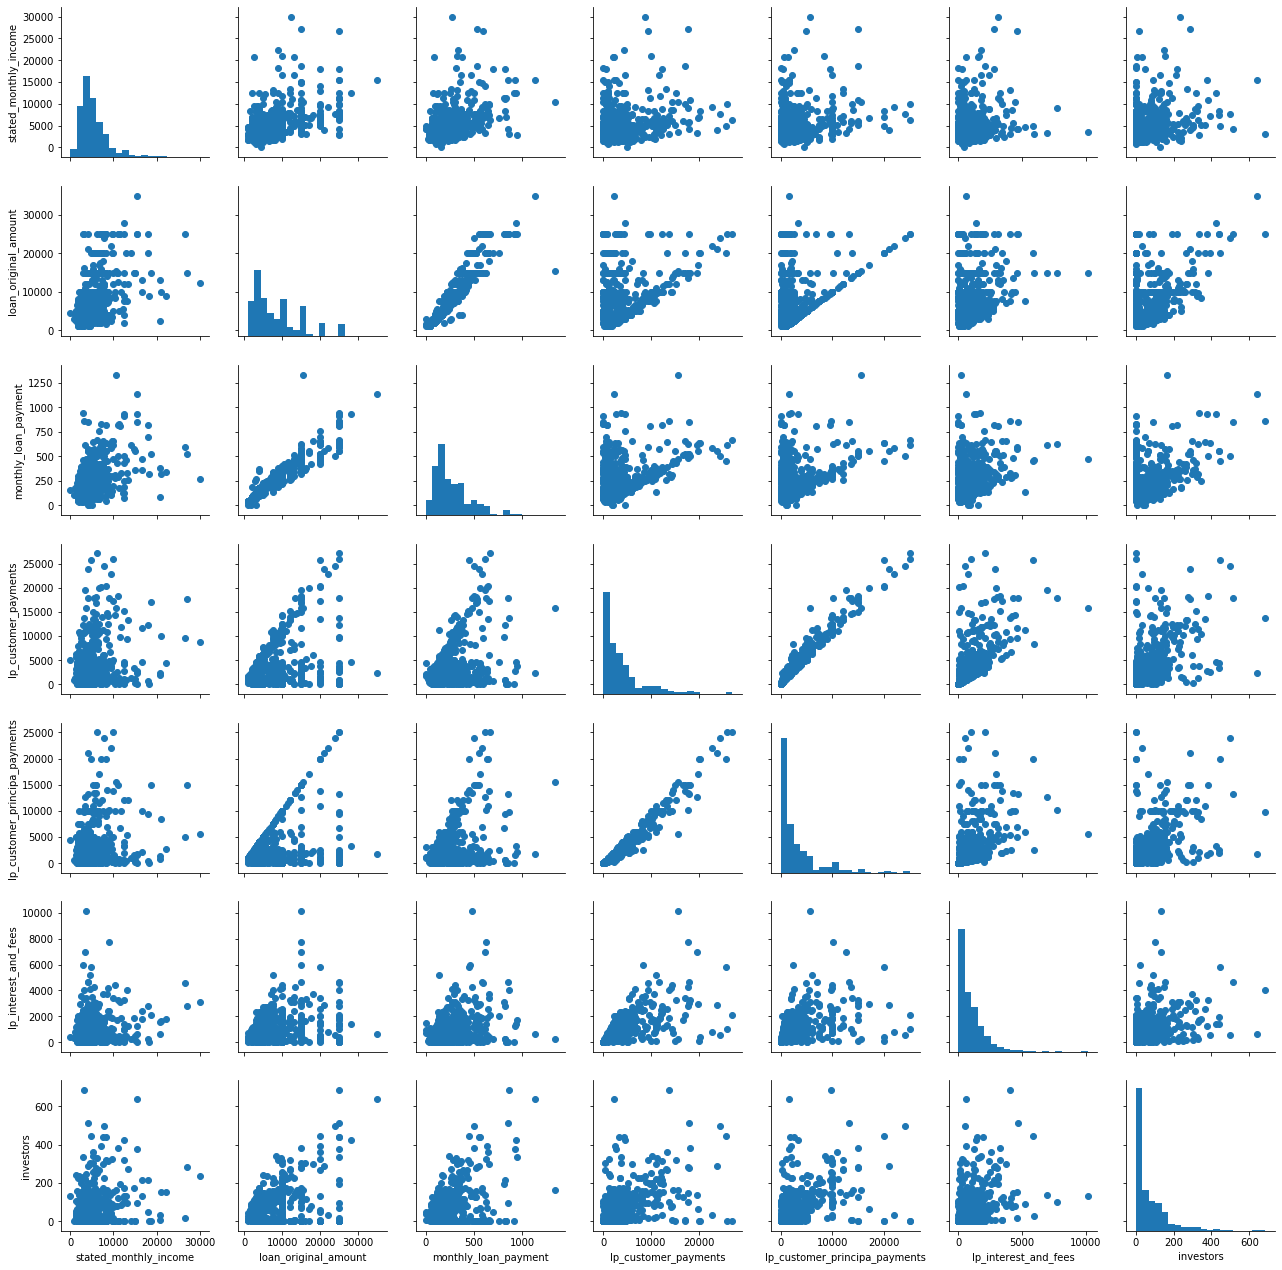

In [36]:
# plot matrix: sample 500 prosperloan numeric_vars2 so that plots are clearer and they render faster
samples = np.random.choice(prosperloan_new.shape[0], 500, replace = False)
prosperloan_new_samp = prosperloan_new.iloc[samples,:]

g = sb.PairGrid(data = prosperloan_new_samp, vars = numeric_vars2)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

From observation the first 3 vairables of interest borrower_apr, borrower_rate, lender_yield has a high correlation among them and its not a suprise because they all have simlar distribtuions. Although with other vairables the correlation are weak. Surprisingly, the correlation coefficient among loan_original_amount, monthly_loan_payment, lp_customer_payments, lp_customer_principa_payments, lp_interest_and_fees, and investors are a bit strong too, but not as strong as the correlation between loan_original_amount, monthly_loan_payment and lp_customer_payments, lp_customer_principa_payments. 

Another observation is the correlation between borrower_rate and investors are not that strong and we can we see the moderate negative correlation hypothesized. I will still like to explore futher this two viarbles as well with other strong correlation vairables. I won't perform any further analyses with these variables amount_delinquent, total_trades, trades_never_delinquent(percentage), debt_to_income_ratio since they are not of interest and they have weak correlations.

For clearer view I divide the numeric variables into two numeric_vars1 and numeric_vars2

Let's move on to looking at how price and carat weight correlate with the categorical variables.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

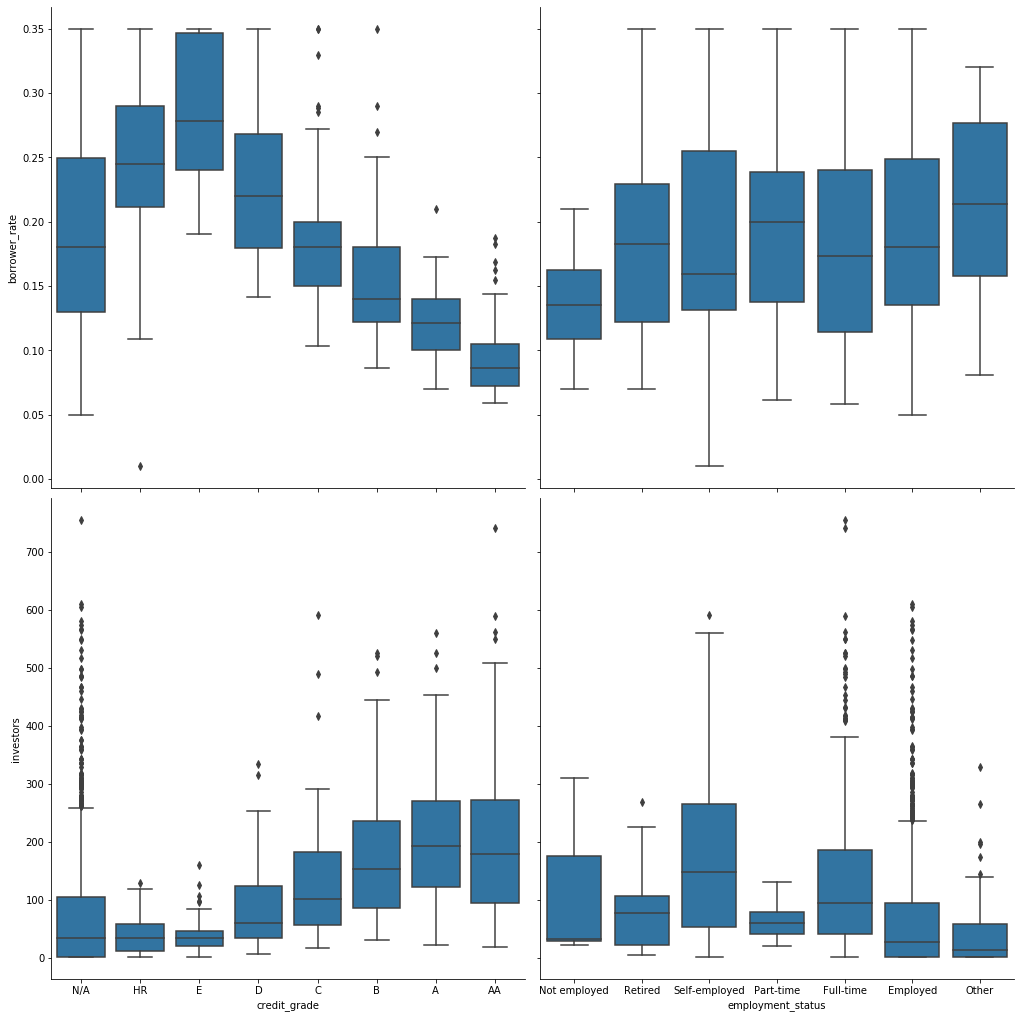

In [37]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(prosperloan_new.shape[0], 2000, replace = False)
prosperloan_new_samp = prosperloan_new.iloc[samples,:]

def boxgrid(stated_monthly_income, monthly_loan_payment, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(stated_monthly_income, monthly_loan_payment, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = prosperloan_new_samp, y_vars = ['borrower_rate', 'investors'], x_vars = categoric_vars1,
                size = 7, aspect = 1)
g.map(boxgrid)
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 576x576 with 0 Axes>

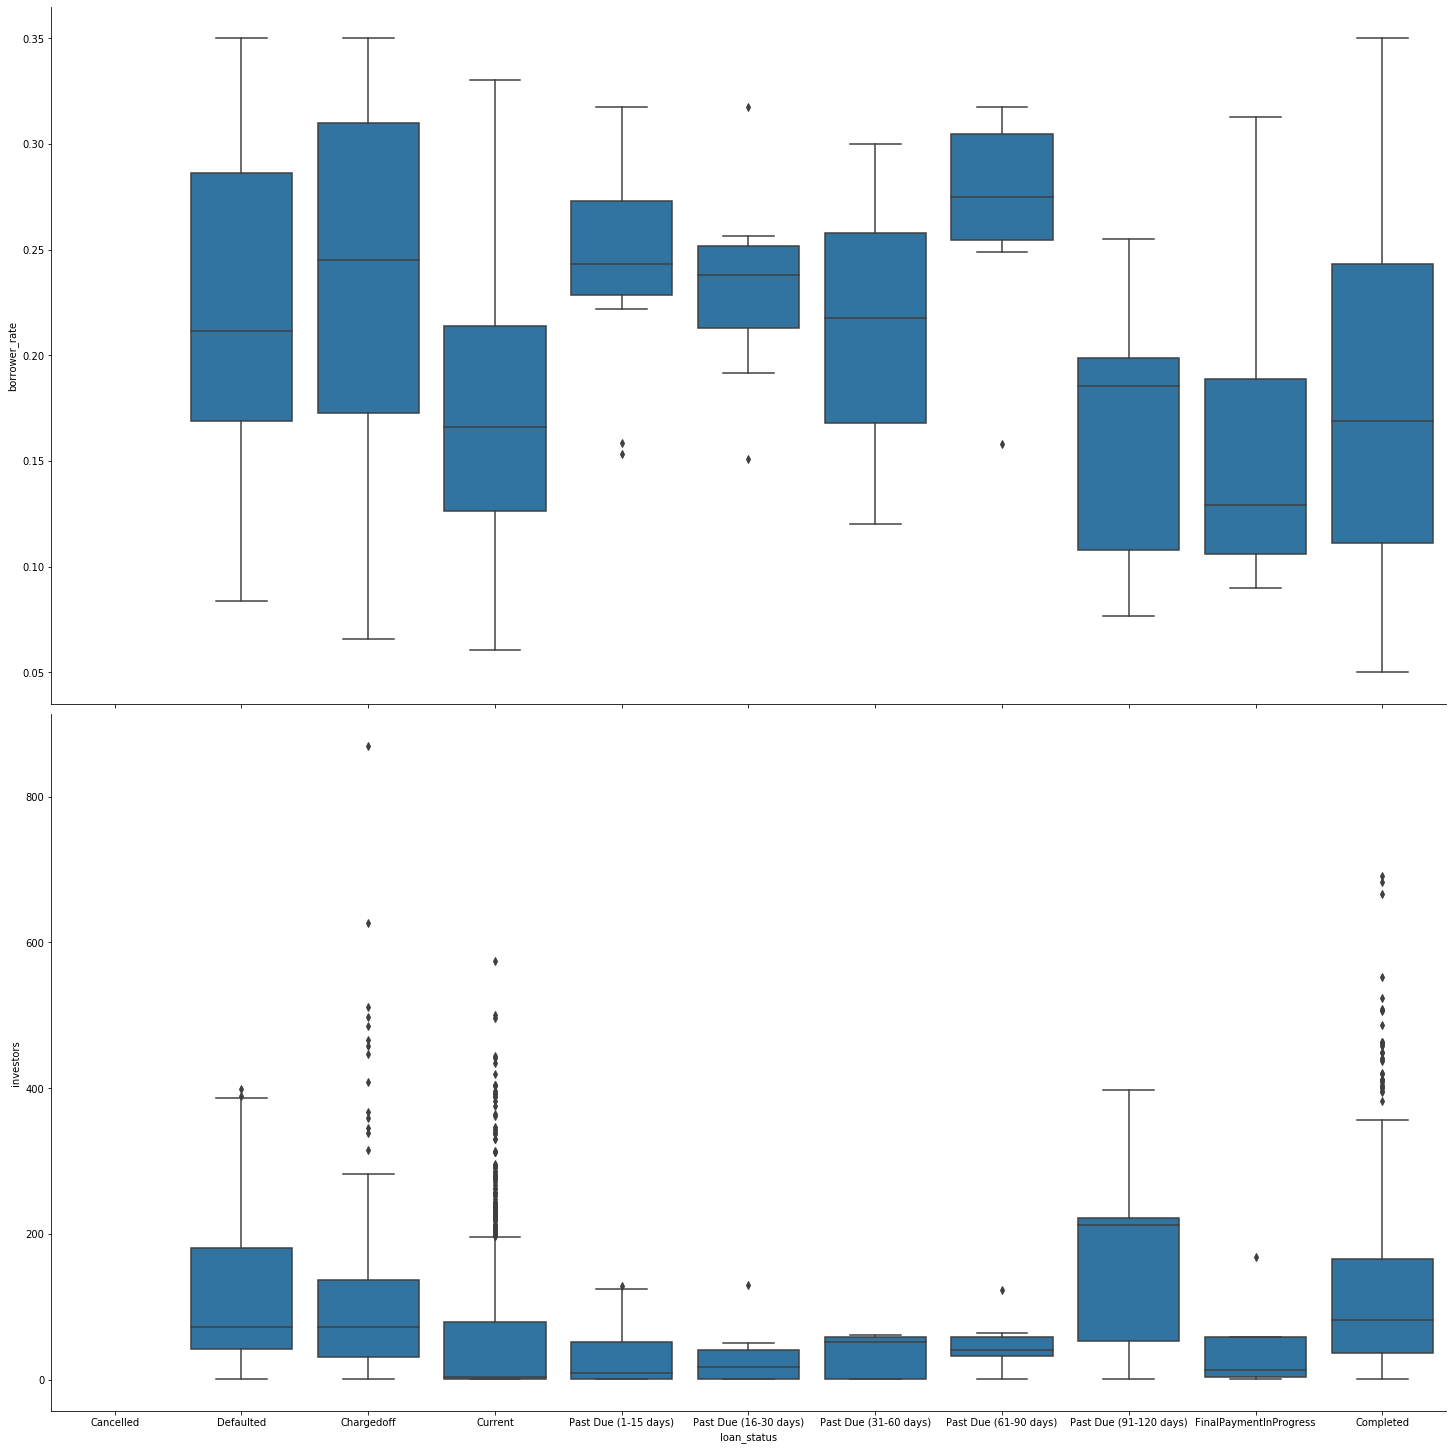

In [38]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(prosperloan_new.shape[0], 2000, replace = False)
prosperloan_new_samp = prosperloan_new.iloc[samples,:]

def boxgrid(stated_monthly_income, monthly_loan_payment, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(stated_monthly_income, monthly_loan_payment, color = default_color)

plt.figure(figsize = [8, 8])
g = sb.PairGrid(data = prosperloan_new_samp, y_vars = ['borrower_rate', 'investors'], x_vars = 'loan_status',
                size = 10, aspect = 2)
g.map(boxgrid)
plt.show();

Clearly, by observation, the relationships between the categorical variable and the two numeric variables hold some negative relationships. Also, we can see that credit_grade AA, employement_status Employed, and loan_status Completed have a lesser average. It will be an interesting feature to explore further.  

Finally, let's look at relationships between the three categorical features.

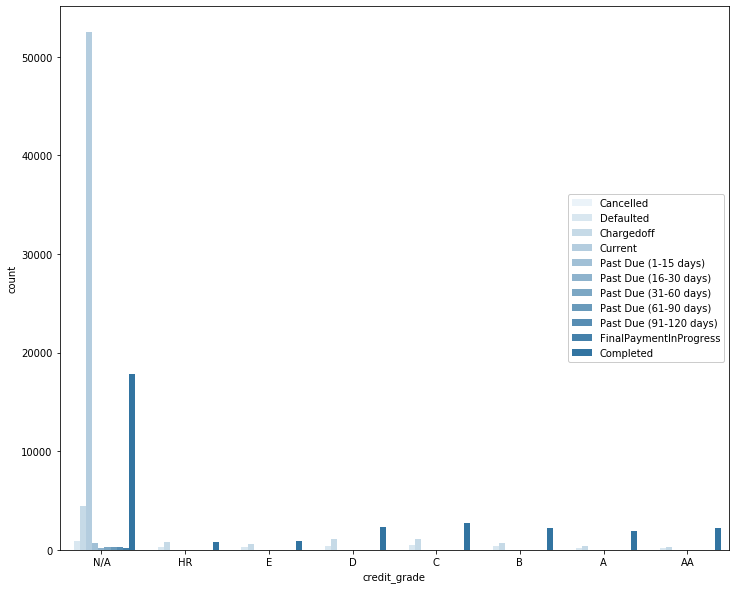

In [39]:
# count plot of loan_status vs. credit_grade
plt.figure(figsize = [12, 10])
base_color = sb.color_palette()[0]
ax = sb.countplot(data = prosperloan_new, x = 'credit_grade', hue = 'loan_status', color = base_color);
ax.legend(loc = 5, ncol = 1, framealpha = 1);

The N/A of the credit grade has the highest Past Due with the highest completed since the loanee's grades are not available. We can see that the relationship between credit_grade and loan_status mostly has a credit grade of loanee's that their loan status shows completed.

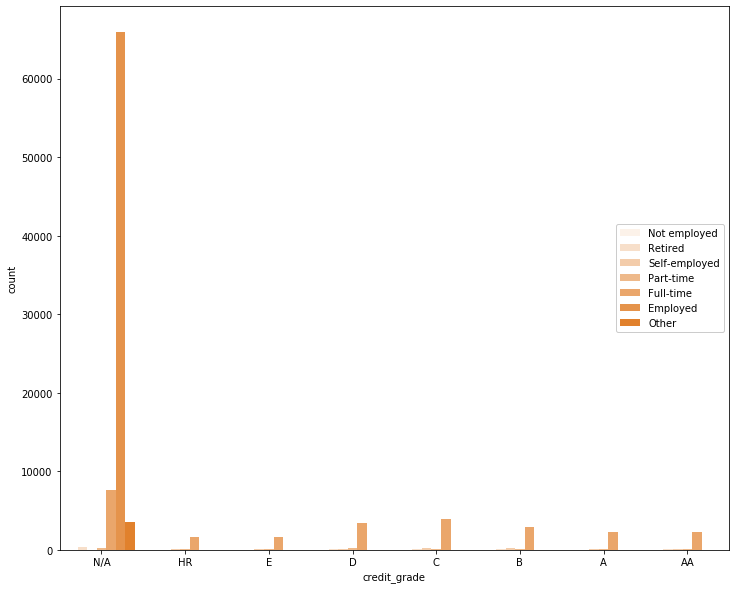

In [40]:
# count plot of employment_status vs. credit_grade
plt.figure(figsize = [12, 10])
base_color = sb.color_palette()[1]
ax = sb.countplot(data = prosperloan_new, x = 'credit_grade', hue = 'employment_status', color = base_color);
ax.legend(loc = 5, ncol = 1, framealpha = 1);

The relationship between credit_grade and employement_status shows that most Full-time employees have been graded and at the N/A of the credit grade employement_status Employed has the highest count followed by Full-time.

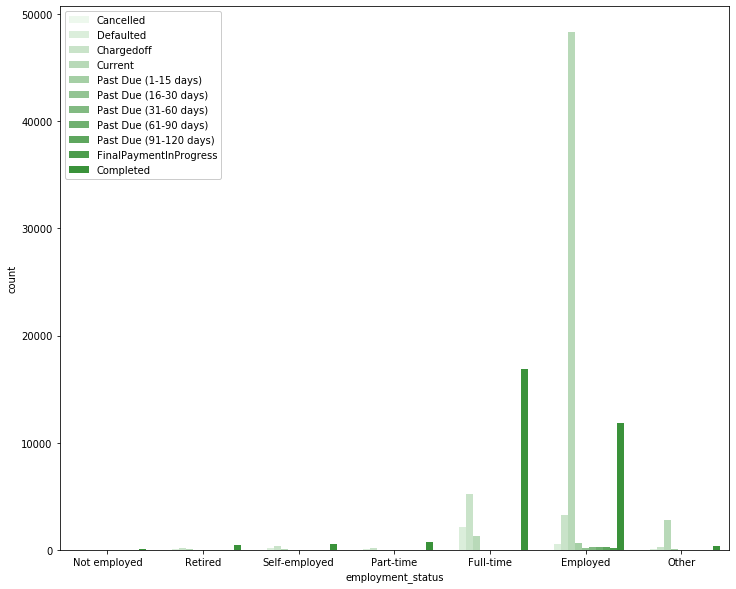

In [41]:
# count plot of loan_status vs. employment_status  
plt.figure(figsize = [12, 10])
base_color = sb.color_palette()[2]
ax = sb.countplot(data = prosperloan_new, x = 'employment_status', color = base_color, hue = 'loan_status');
ax.legend(loc = 2, ncol = 1, framealpha = 1);

The relationship between employement_status and loan_status shows that the Current of the loan status has the highest count for the employement_status Employed. Also, the Completed of the loan status has the most indicators in the employement_status.

Since the preliminary look at bivariate relationships is out of the way, I want to look at some relationships more. 

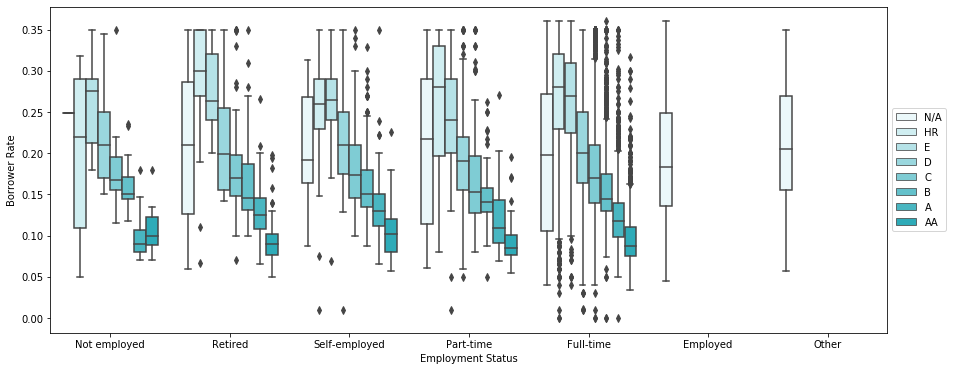

In [42]:
# plot boxplot for employment_status, borrower_rate, credit_grade
plt.figure (figsize = [15,6]);
base_color = sb.color_palette()[9]
sb.boxplot(data = prosperloan_new, x = 'employment_status', y = 'borrower_rate', color = base_color, hue = 'credit_grade' );
plt.xlabel('Employment Status');
plt.ylabel('Borrower Rate');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

I observed the relationships between two categorical variables (employment_status and credit_grade) and the numeric variable borrower_rate. We can see that Employed and Other of the employment_status have only boxplot N/A of the credit_grade. There are positive relationships among the categorical variables against the borrower_rate. The AA of the credit_grade is small for two of the employment_status(Retired and Part-time) with a little average.

let's look at relationships between Credit Grade, Borrower Rate, and Investors.

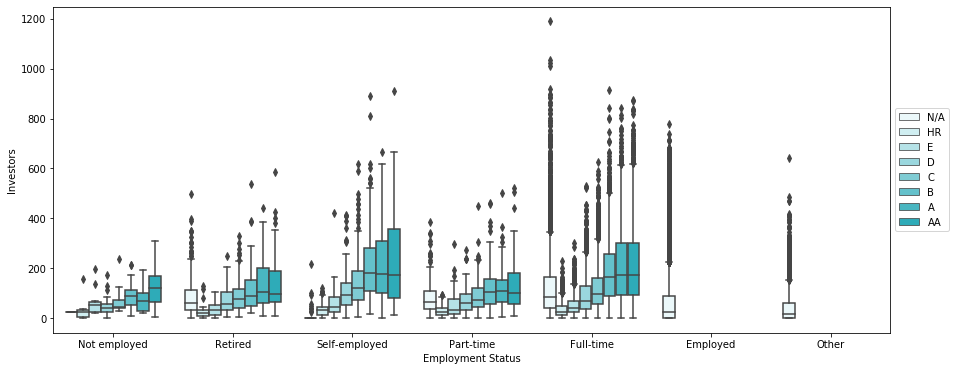

In [43]:
# plot boxplot for credit_grade, borrower_rate, investors
plt.figure (figsize = [15,6]);
base_color = sb.color_palette()[9]
sb.boxplot(data = prosperloan_new, x = 'employment_status', y = 'investors', color = base_color, hue = 'credit_grade' );
plt.xlabel('Employment Status');
plt.ylabel('Investors');
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

I observed the relationships between two categorical variables (employment_status and credit_grade) and the numeric variable investors. We can see that Employed and Other of the employment_status have only boxplot N/A of the credit_grade. There are weak relationships among the categorical variables against the borrower_rate. The HR of the credit_grade is small for almost every employment_status features except  Employed and Other. 

let's look at relationships between Borrower Rate vs. Lender Yield.

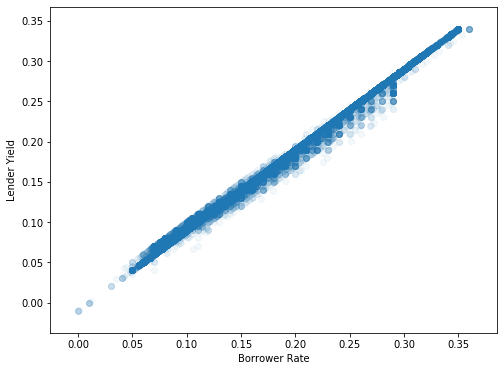

In [44]:
# scatter plot of borrower_rate vs. lender_yield with full data

plt.figure(figsize = [8, 6])
plt.scatter(data = prosperloan_new, x = 'borrower_rate', y = 'lender_yield', alpha = 0.05)
plt.xlabel('Borrower Rate')
plt.ylabel('Lender Yield')
plt.show()

This distribution is the relationships between two numeric variables borrower_rate and lender_yield by using the full data. By observation, there isn't much different from when we use the sample of 500 because they have a strong correlation coefficient. Also, this is a positive scatter plot that depicts a strong relationship between the variables.

let's look at relationships between investors vs. Lender Yield.

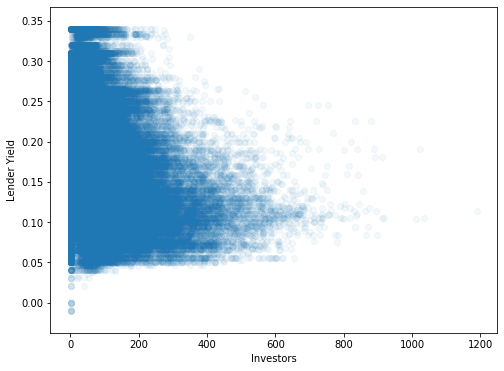

In [45]:
# scatter plot of investors vs. lender_yield with full data
plt.figure(figsize = [8, 6])
plt.scatter(data = prosperloan_new, x = 'investors', y ='lender_yield' , alpha = 0.05)
plt.xlabel('Investors')
plt.ylabel('Lender Yield')
plt.show()

This distribution is the relationship between two investors and lender_yield variables with the use of Full data. By observation, there isn't much different from when we use the sample of 500 because they have a weak correlation coefficient. Also, this scatters plot depicts a weak relationship between the variables because the investor's variables are widely varied.

Let's look at relationships between categorical variables Employment Status and Credit Grade against Borrower Rate and Lender Yield.

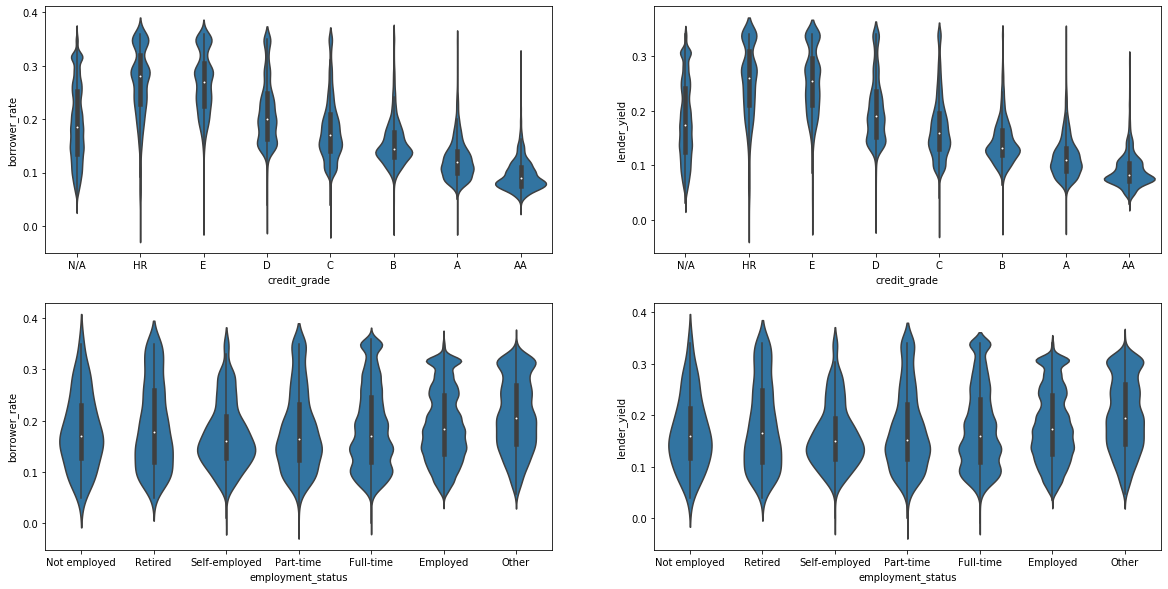

In [46]:
# plot the categorical variables against borrower_rate and lender_yield again, this time
# with full data and variable transforms
fig, ax = plt.subplots(ncols = 2, nrows = 2 , figsize = [20,10])

for i in range(len(categoric_vars1)):
    var = categoric_vars1[i]
    sb.violinplot(data = prosperloan_new, x = var, y = 'borrower_rate', ax = ax[i,0],
               color = default_color)
    sb.violinplot(data = prosperloan_new, x = var, y = 'lender_yield', ax = ax[i,1],
               color = default_color)

plt.show()

The relationships between two categorical variables (employment_status and credit_grade) and two numeric variables (borrower_rate and lender_yield) were observed. We observed that the AA of the credit_grade for both numeric variables is a bit different in their median. Also, the Employed of the employment_status for both numeric variables different by the numbers of Outliers, and the distributions for lender_yield are slightly higher concentrated around the median than borrower_rate variable.

Let's look at relationships between categorical variables Loan Status against Borrower Rate and Lender Yield.

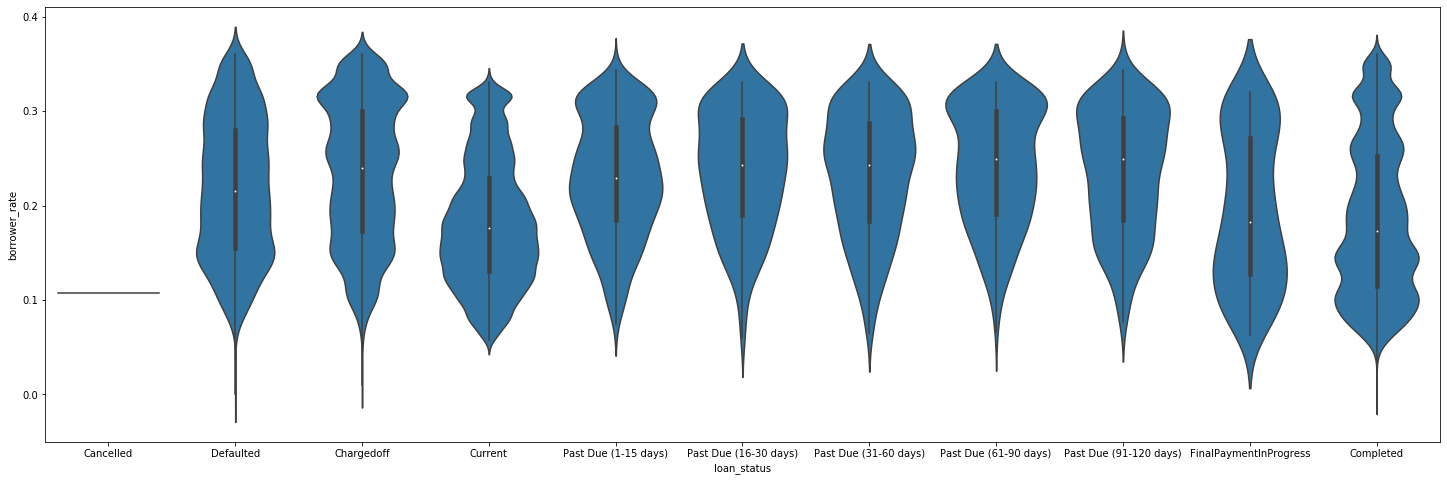

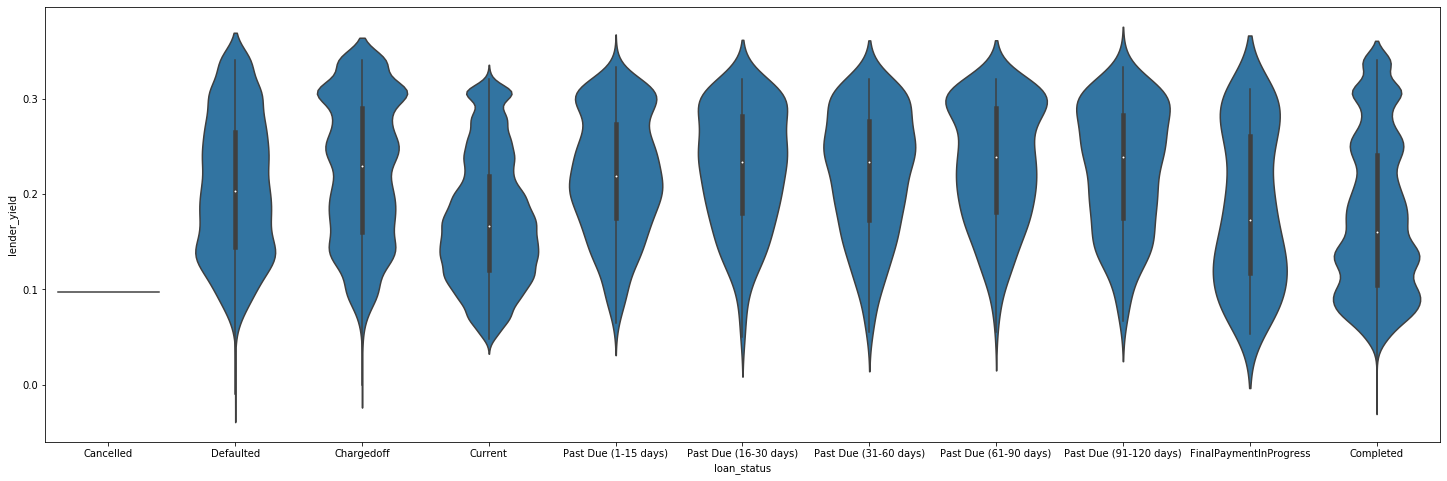

In [47]:
# plot the categorical variables against borrower_rate and lender_yield again, this time
# with full data and variable transforms
plt.figure(figsize = [25, 8])


sb.violinplot(data = prosperloan_new, x = 'loan_status', y = 'borrower_rate', color = default_color)

plt.show()

plt.figure(figsize = [25, 8])

sb.violinplot(data = prosperloan_new, x = 'loan_status', y = 'lender_yield', color = default_color)

plt.show()


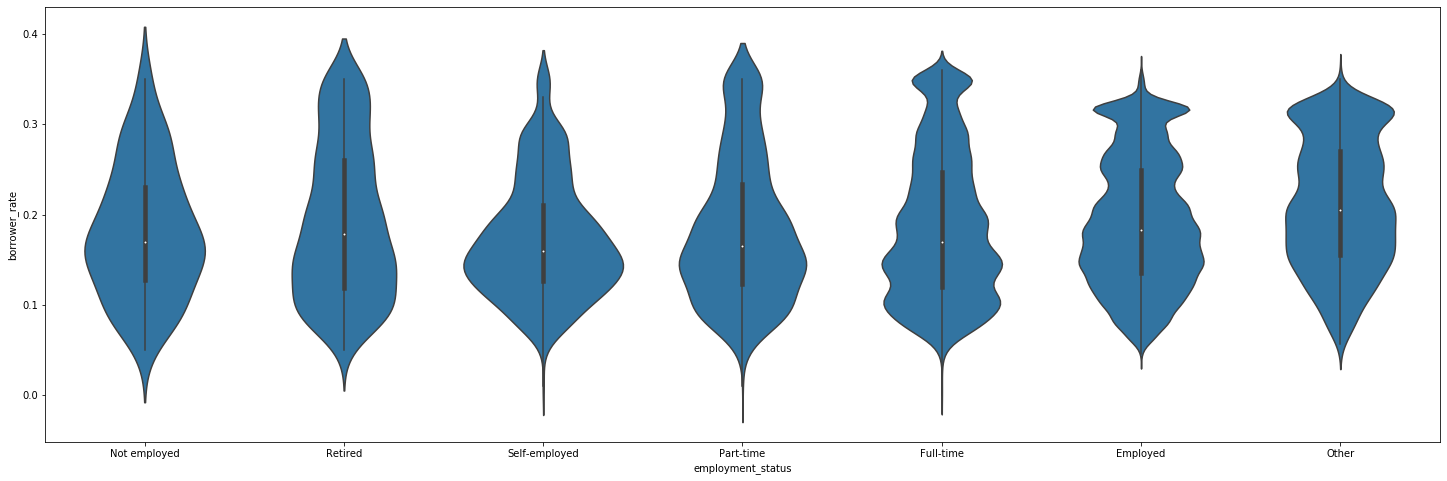

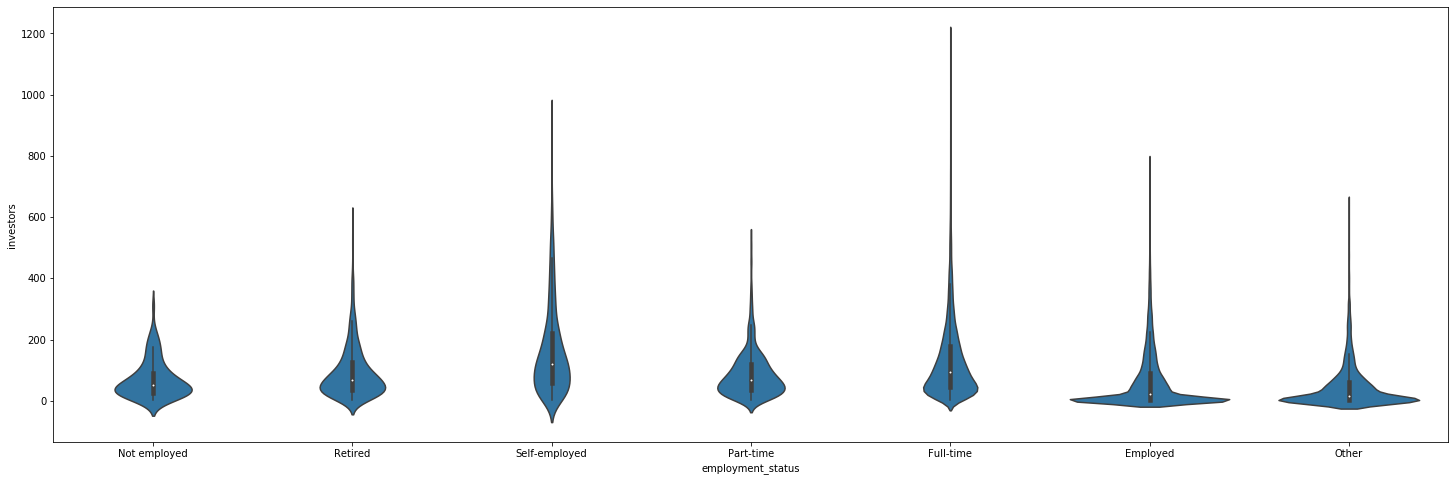

In [48]:
# plot the categorical variables against borrower_rate and lender_yield again, this time
# with full data and variable transforms
plt.figure(figsize = [25, 8])


sb.violinplot(data = prosperloan_new, x = 'employment_status', y = 'borrower_rate', color = default_color)

plt.show()

plt.figure(figsize = [25, 8])

sb.violinplot(data = prosperloan_new, x = 'employment_status', y = 'investors', color = default_color)

plt.show()


We observed the relationships between categorical variables employment_status and two numeric variables (borrower_rate and investors) . The difference between the two numeric variables against the employment_status is very wide. All the features of the loan_status for investors have its median lower than borrower_rate median.  

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Amazingly the Borrower Rate shows a strong and positive correlation with two other numeric variables. These show that loanees are most attracted to get loans because of the borrower rate. I was also able to observe that most employed and full-time workers are the most loanee's. Also, I wanted to check if the investors affect how loanee's of different employment status, But these were observed to have less than average on the loanees

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes, the Lender Yield and Borrower APR have a strong correlation relationship. Also, the Credit Grade and Loan Status shows how they are related to each credit grade either the loan process is completed, current, payment due, state to highlight few.

## Multivariate Exploration

>My main focus of exploration is on how the three categorical measures of quality play into the relationship between Borrower APR, Borrower Rate, Lender Yiel, and Investors.

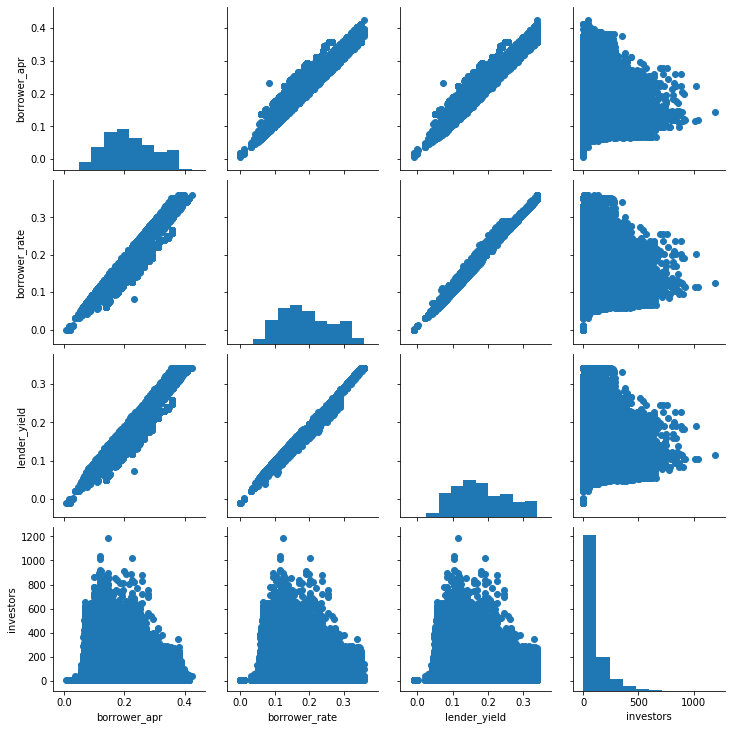

In [49]:
# plot matrix for borrower_apr, borrower_rate, lender_yield, investors
prosperloan_stats = ['borrower_apr', 'borrower_rate', 'lender_yield', 'investors']
g = sb.PairGrid(data = prosperloan_new, vars = prosperloan_stats)
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

We have observed this before. But this time, let look at these four numeric variables borrower_apr, borrower_rate, lender_yield, investors. According to our previous observation, we know there is a strong relationship between borrower_apr, borrower_rate, lender_yield, and weaker relationships between investors and this other three numeric variables (borrower_apr, borrower_rate, lender_yield). 

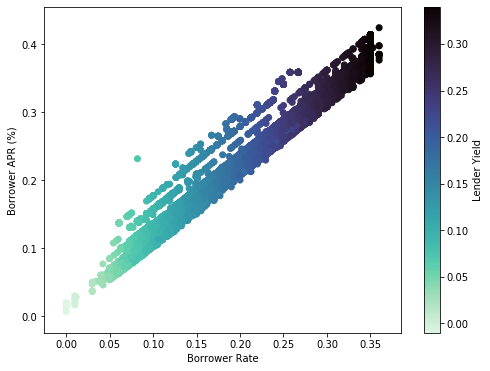

In [50]:
# plot scatter for borrower_apr, borrower_rate and lender_yield
plt.figure (figsize = [8,6])
plt.scatter(data = prosperloan_new, x = 'borrower_rate', y = 'borrower_apr', c = 'lender_yield', cmap = 'mako_r');
plt.xlabel('Borrower Rate');
plt.ylabel('Borrower APR (%)');
plt.colorbar(label = 'Lender Yield');

The relationship between borrower_rate, borrower_apr, and lender_yield has a strong correlation coefficient. We observe that from mark 0.20 to 0.35 we have a strong correlation.

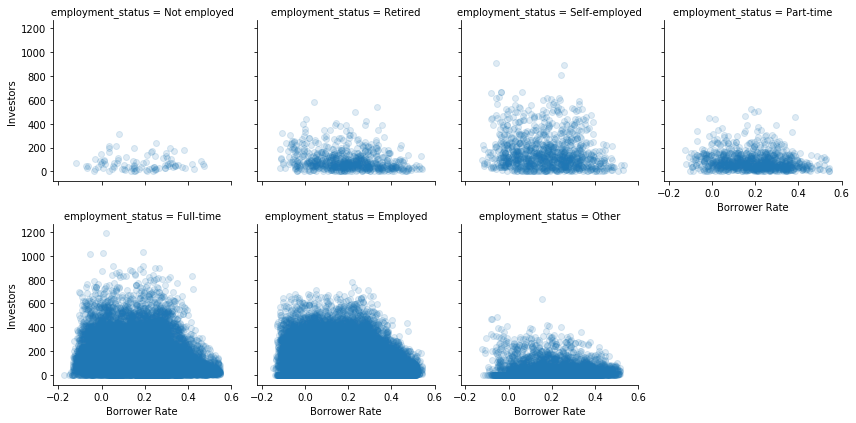

In [51]:
# create faceted regplot for borrower_rate, investors, employment_status
g = sb.FacetGrid(data = prosperloan_new, col = 'employment_status', palette = 'viridis_r', col_wrap = 4 )
g.map(sb.regplot, 'borrower_rate', 'investors', x_jitter = 0.2, scatter_kws = {'alpha' : 1/7}, fit_reg = False);
g.set_xlabels('Borrower Rate');
g.set_ylabels('Investors');

When I looked at the relationship between two numeric variables (borrower_rate and investors) and employment_status of the category variable. We can see that borrower_rate against investors for Not employed of employment_status are very few compared to the Full-time and Employed of employment_status. This indicates that the investors that invested in the loan program gained more from the borrower rate for Full-time and Employed as compared to Others, Retired, Self-employed, Part-time, and Not employed of employment_status.

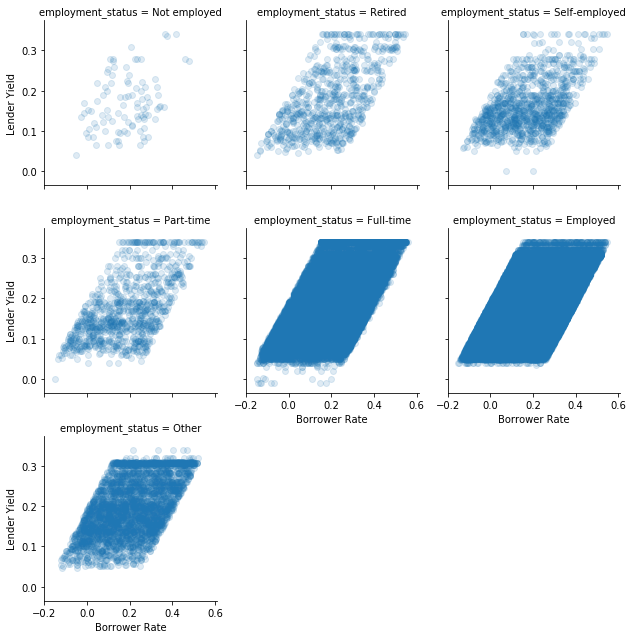

In [52]:
g = sb.FacetGrid(data = prosperloan_new, col = 'employment_status', palette = 'viridis_r', col_wrap = 3 )
g.map(sb.regplot, 'borrower_rate', 'lender_yield', x_jitter = 0.2, scatter_kws = {'alpha' : 1/7}, fit_reg = False);
g.set_xlabels('Borrower Rate');
g.set_ylabels('Lender Yield');

In this relationship between borrower_rate, lender_yield, and employment_status, I noticed that the Full-time and Employed of the employment_status should give or gave more lender yield as against the borrower rate. Other of the employment status also have a fair lender yield compared to Retired, Self-employed, Part-time, and Not employed.

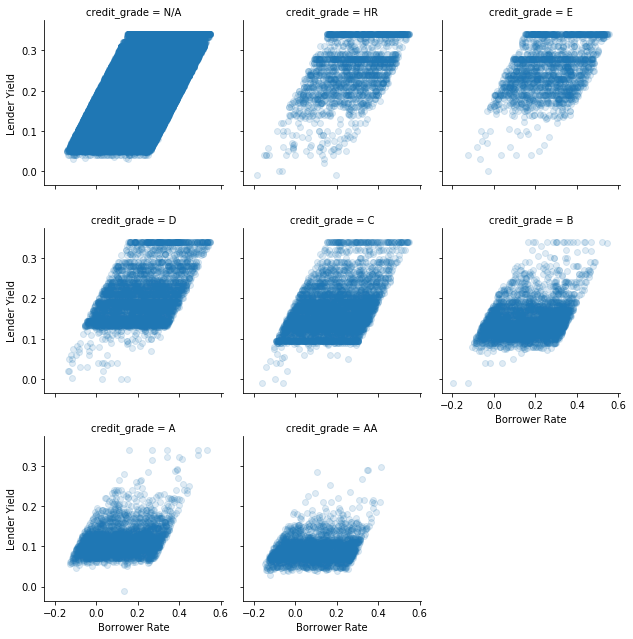

In [53]:
# create faceted regplot for borrower_rate, lender_yield, credit_grade
g = sb.FacetGrid(data = prosperloan_new, col = 'credit_grade', palette = 'viridis_r', col_wrap = 3 )
g.map(sb.regplot, 'borrower_rate', 'lender_yield', x_jitter = 0.2, scatter_kws = {'alpha' : 1/7}, fit_reg = False);
g.set_xlabels('Borrower Rate');
g.set_ylabels('Lender Yield');

The relationship between borrower_rate, lender_yield, and credit_grade, The credit grade N/A indicates that the lender yield against the borrower rate is high and low for some. Since the credit grade is not available yet. We can see that other credit grades in different categories have few lender yields, although this differs in the credit grade. 

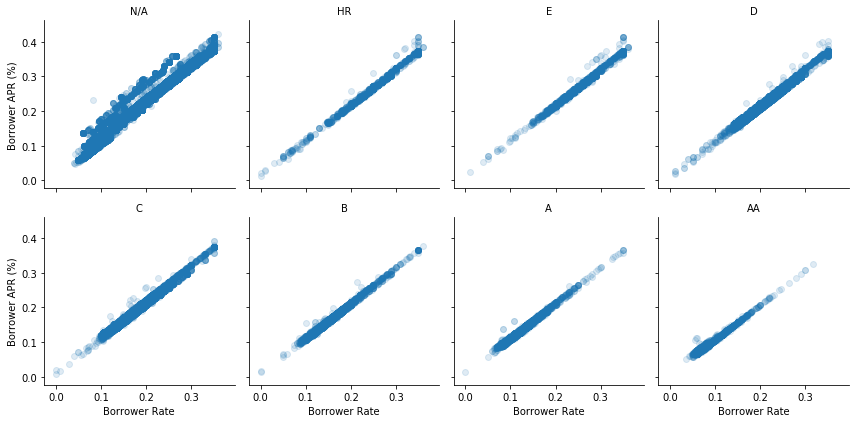

In [54]:
# create faceted scatter heat maps for borrower_apr, borrower_rate, credit_grade
g = sb.FacetGrid(data = prosperloan_new, col = 'credit_grade', col_wrap=4, height = 3);
g = (g.map(plt.scatter, 'borrower_rate', 'borrower_apr',  alpha = 1/7)
     .set_titles("{col_name}"));
g.set_xlabels('Borrower Rate');
g.set_ylabels('Borrower APR (%)');

The relationship between borrower_rate, borrower_apr, and credit_grade. For every credit grade category, there is a stronger correlation as expected. This is an indication that the Borrower APR has almost the same effect on loanees as the Borrower Rate. 

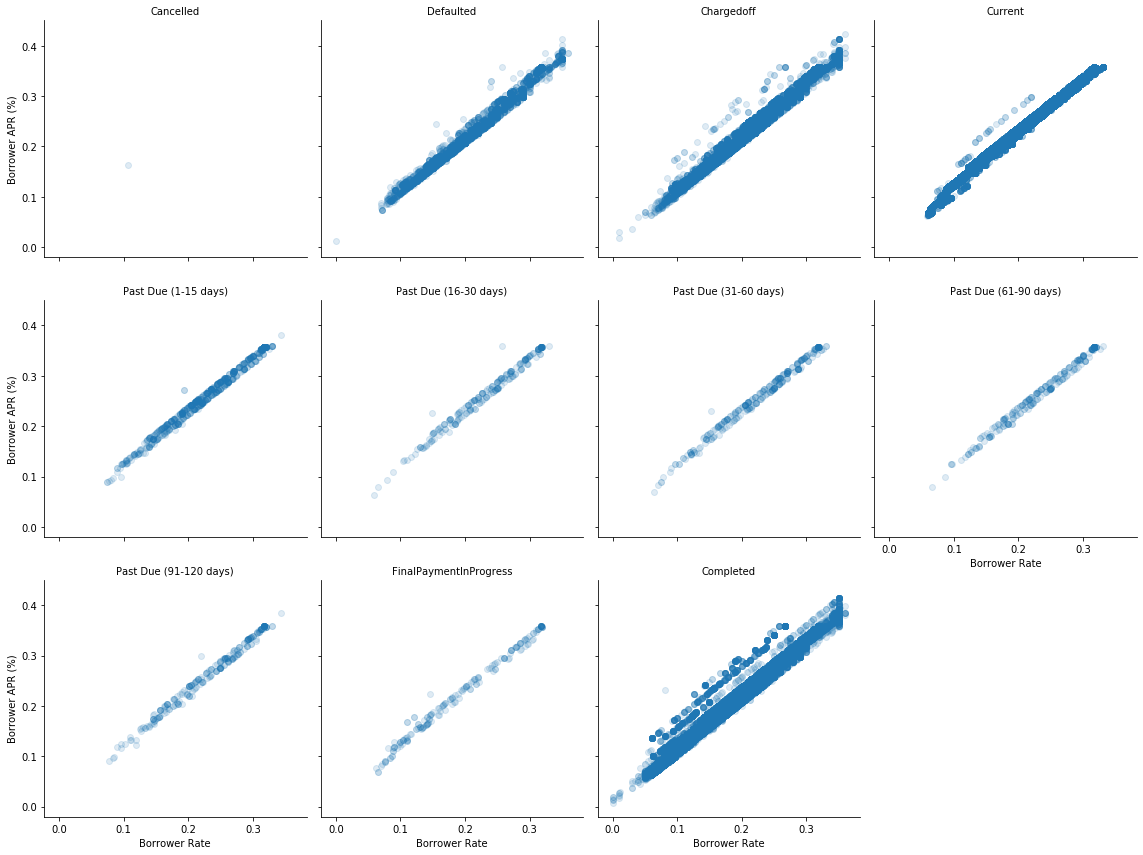

In [55]:
# create faceted scatter heat maps for borrower_apr, borrower_rate, loan_status
g = sb.FacetGrid(data = prosperloan_new, col = 'loan_status', col_wrap=4, height = 4);
g = (g.map(plt.scatter, 'borrower_rate', 'borrower_apr',  alpha = 1/7)
     .set_titles("{col_name}"));
g.set_xlabels('Borrower Rate');
g.set_ylabels('Borrower APR (%)');

The relationship between borrower_rate, borrower_apr, and loan_status. From observation there are about five loan statuses such as Past Due(16-30days), Past Due(31-60days), Past Due(61-90days), Past Due(91-120days),and FianalPaymentInProgress that have weak correlation in borrower_rate against borrower_apr. We can then conclude that we have fewer loanees in these categories as against the Completed, Current, Chargedoff, and Defaulted except the Cancelled category.

I  want to look at this relationship between Credit Grade, LP Customer Payments,  LP Customer Principa Payments since they cut my attention during bivariate matrixes.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


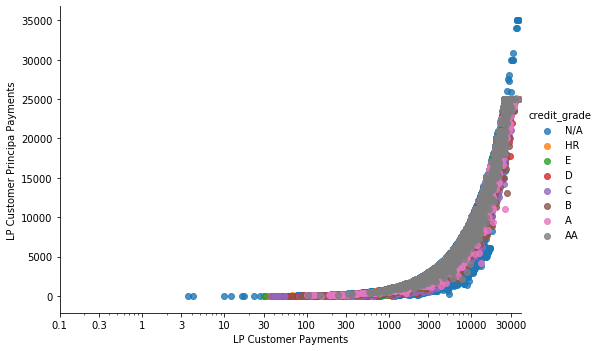

In [56]:
# create faceted regplot for credit_grade, lp_customer_payments, lp_customer_principa_payments
g = sb.FacetGrid(data = prosperloan_new, hue = 'credit_grade', size = 5, aspect = 1.5);
g = g.map(sb.regplot, 'lp_customer_payments', 'lp_customer_principa_payments', fit_reg = False);
g.set(xscale = 'log'); 
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
g.set(xticks = x_ticks, xticklabels = x_ticks);
g.set_xlabels('LP Customer Payments');
g.set_ylabels('LP Customer Principa Payments');
g.add_legend();

The relationship between lp_customer_payments and lp_customer_principa_payments cut my attention because of their strong correlation coefficient. I decided to plot it with  credit_grade. By observation, we can conclude that the AA of the credit_grade which is the highest grade has a huge rise in the lp_customer_principa_payments against lp_customer_payments from the mark of 400 to 25000.

Lastly I also checked the relationship lp_interest_and_fees, credit_grade, investors.

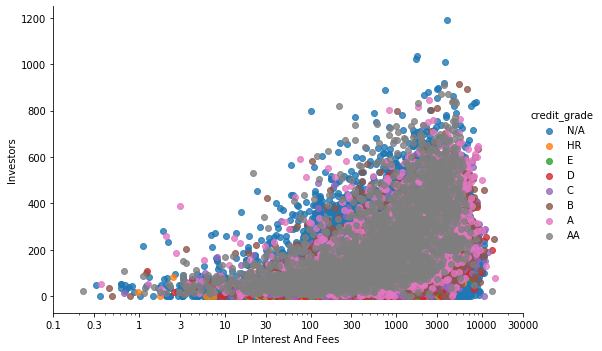

In [57]:
# create faceted regplot for lp_interest_and_fees, credit_grade, investors
g = sb.FacetGrid(data = prosperloan_new, hue = 'credit_grade', size = 5, aspect = 1.5);
g = g.map(sb.regplot, 'lp_interest_and_fees', 'investors', fit_reg = False);
g.set(xscale = 'log'); 
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000]
g.set(xticks = x_ticks, xticklabels = x_ticks);
g.set_xlabels('LP Interest And Fees');
g.set_ylabels('Investors');
g.add_legend();

The relationship between investors against lp_interest_and_fees with credit_grade is actually to see how the investors effect since it has a fairly strong correlation with lp_interest_and_fees. As we can observe, there are numerous N/A, A, and AA of the Credit grade scattered show an expected weak correlation coefficient.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> My investigation was to see more of how Borrower Rate, Borrower APR and Lender Yield played a role to influence loanees to get loans with a different type of employment. I was able to see that these three numeric variables affect how the loans are attainable. Also, from this observation, the Investors were able to make gains from mostly employed workers even if they have some shortcomings. 

### Were there any interesting or surprising interactions between features?

> Surprisingly I was thinking because of the strong relationship between Borrower Rate and Lender Yield. The would have been a stronger Lender Yield in the Credit grade just as we have for the Employment status. But that was not the case. We observed less Lender Yield in the Credit grade categories except where the Credit grade can't be determined.